In [5]:
import os
# import pyedflib
import argparse
import statistics
import numpy as np
import scipy.signal 
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, models, transforms
import torch.optim as optim


class Omid_Dataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        
#         x_ten = torch.tensor(np.expand_dims(self.X[idx],1))
        x_ten = torch.tensor(self.X[idx])
        y_ten = torch.tensor(self.y[idx])
        
        if self.transform:
            x_ten = self.transform(x_ten)
        
        return x_ten, y_ten

def read_data():
    
#     data = np.load("C:/Features/ECGFULLALLDATA.npy")
    data = np.load("C:/Features/EEGFULLALLDATA.npy")
    
    
    X_train = np.array(data)   
    y_train = np.load("C:/Features/ECGFULLALLDATA_lbl.npy")
    
    print(X_train.shape, y_train.shape)
    train_dataset = Omid_Dataset(X_train, y_train)
    valid_dataset = Omid_Dataset(X_train[int(4/5*len(X_train)):], y_train[int(4/5*len(X_train)):])
    
    batch_size = 2
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    validation_loader = DataLoader(valid_dataset, batch_size=batch_size//2)
    
    return train_loader, validation_loader
    

In [6]:
a = np.array([[1,2,3],[4,5,6]])
a.shape
np.expand_dims(a,0).shape

(1, 2, 3)

In [7]:
train_loader, validation_loader = read_data()

(240731, 3750) (240731,)


In [8]:
cnt = 0
for i,j in train_loader:
    cnt+=1
    print(i.shape)
    if cnt == 12:
        break

torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])
torch.Size([2, 3750])


mfccc full matrix version

In [9]:
# data = np.load("C:/Features/ECGFULLALLDATA.npy")
data = np.load("C:/Features/EEGFULLALLDATA.npy")
X_train = np.array(data)

In [10]:
np.array(i[0]).shape

(3750,)

In [11]:
X_train.shape

(240731, 3750)

In [12]:
i[0].shape
X_train.shape

(240731, 3750)

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_23996\3223019120.py:32: FutureWarning: Pass y=[[  6.37254902  10.29411765   0.49019608 ...   4.41176471   5.39215686
    5.39215686]
 [  6.37254902   6.37254902   2.45098039 ...  12.25490196  12.25490196
   18.1372549 ]
 [ 18.1372549   17.15686275  17.15686275 ...   4.41176471   8.33333333
    8.33333333]
 ...
 [ -4.41176471  -0.49019608 -14.21568627 ...  11.2745098   -1.47058824
    3.43137255]
 [  2.45098039  -1.47058824   1.47058824 ...   3.43137255   8.33333333
   -9.31372549]
 [  8.33333333   3.43137255  10.29411765 ...   1.47058824 -13.23529412
    5.39215686]] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


>>>>>>  log_S.shape  >>>> (240731, 32, 30)
plot size (240731, 32, 30)


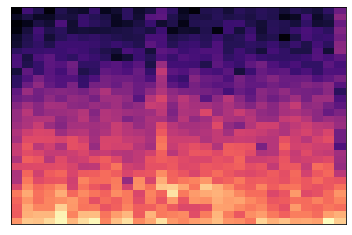

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np 
import pandas as pd
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, models, transforms
import torch.optim as optim

####################
# x = np.array(i[0])
x = X_train
sample_rate = 125
#####################
# librosa.display.waveshow(x, sr=sample_rate)
# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
# Xdb.shape
# plt.show()

S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used

log_S = librosa.power_to_db(S, ref=np.max)
MFCC = librosa.feature.mfcc(S=log_S, n_mfcc=10) # While specifying the number of mfcc-coefficients, it keeps 39 coefficients of discrete cosine transformation (DCT)

#     delta2_mfcc = librosa.feature.delta(MFCC, order=2)
# MFCC = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=10, dct_type=2)

print(">>>>>>  log_S.shape  >>>>", log_S.shape)
librosa.display.specshow(log_S[0])

print("plot size", log_S.shape)
# print(np.max(MFCC),np.min(MFCC))

# print(np.amax(MFCC, axis=1),np.amin(MFCC, axis=1))

# MFCC = (MFCC+200)/500
# print(np.max(MFCC),np.min(MFCC))

# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [14]:
log_S[:,1:-1,:].shape

(240731, 30, 30)

In [15]:
# np.save("C:/Features/log_S_32_10",log_S[:,1:-1,:])
np.save("C:/Features/log_S_32_10_eeg",log_S[:,1:-1,:])

In [16]:
X = np.load("C:/Features/log_S_32_10.npy")
Y = np.load("C:/Features/log_S_32_10_eeg.npy")

In [26]:
np.expand_dims(X,1).shape

(240731, 1, 30, 30)

In [27]:
np.expand_dims(Y,1).shape

(240731, 1, 30, 30)

In [30]:
np.save("C:/Features/log_S_eeg_ecg", np.concatenate((np.expand_dims(X,1), np.expand_dims(Y,1), np.expand_dims(Y,1)),1))

In [ ]:
# np.save("C:/Features/mfcc",MFCC)

In [ ]:
# np.amax(MFCC.reshape(240731,-1), axis=1).shape
# np.save("C:/Features/maxmfcc",np.amax(MFCC.reshape(240731,-1), axis=1))

In [ ]:
# np.amin(MFCC.reshape(240731,-1), axis=1).shape
# np.save("C:/Features/minmfcc",np.amin(MFCC.reshape(240731,-1), axis=1))

torch.Size([2, 3750])


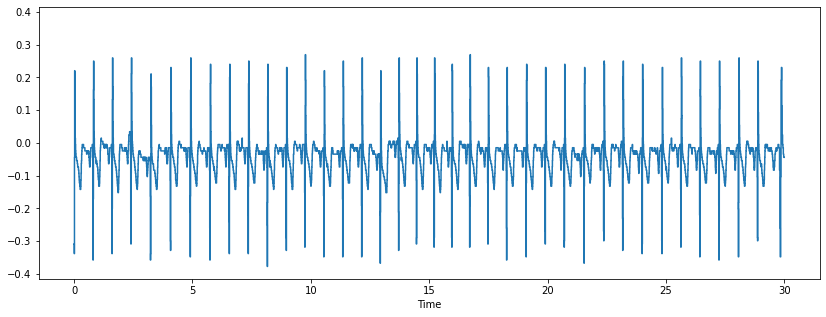

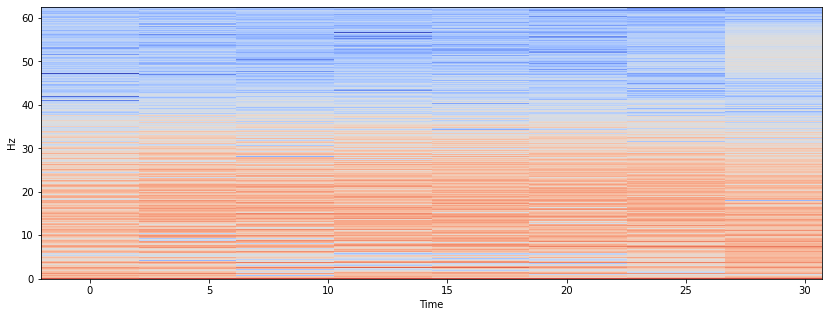

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.30882353 -0.33823529 -0.04411765 ... -0.04411765 -0.04411765
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
132.30139793478503 -28.87065018735451
0.66460279586957 0.342258699625291


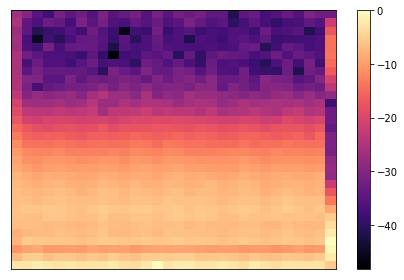

torch.Size([2, 3750])


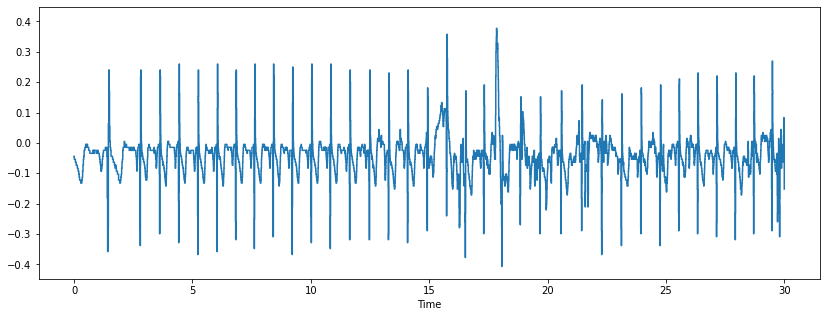

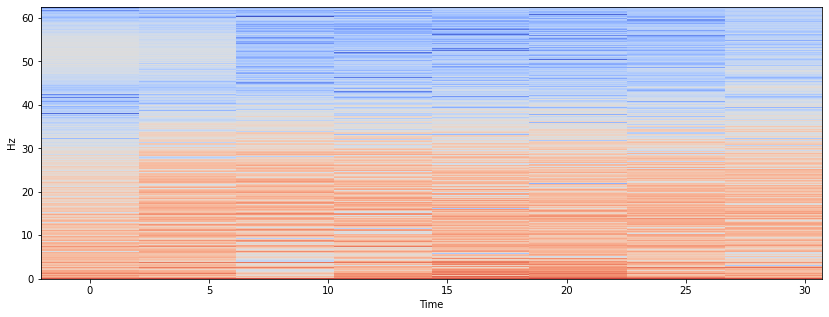

plot size (32, 30)
138.38435815699728 -28.354957499019143
0.6767687163139946 0.3432900850019617


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.04411765 -0.05392157 -0.05392157 ...  0.08333333  0.03431373
 -0.15196078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


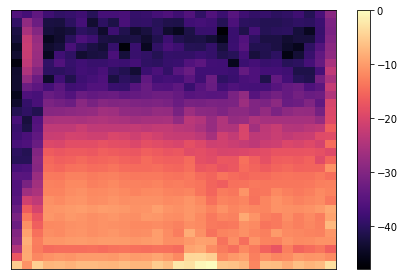

torch.Size([2, 3750])


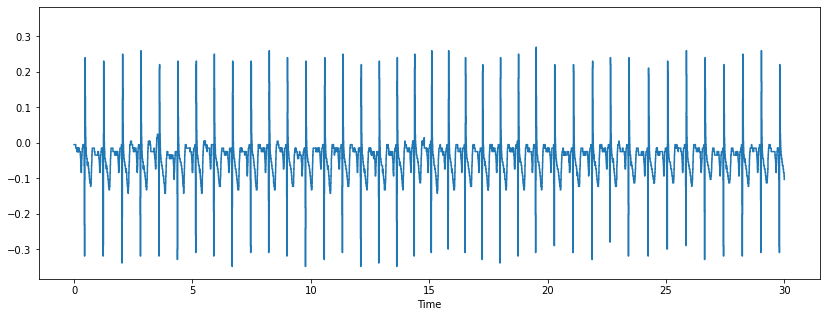

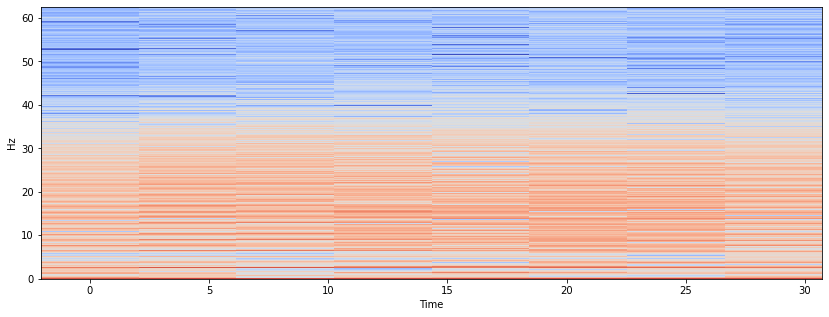

plot size (32, 30)
128.13643997056272 -28.712412638752937
0.6562728799411255 0.3425751747224941


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.00490196 ... -0.08333333 -0.09313725
 -0.10294118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


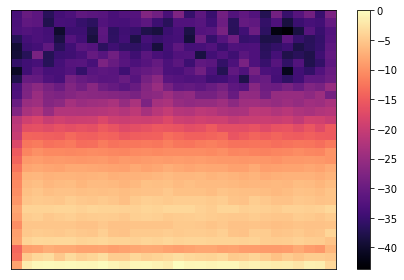

torch.Size([2, 3750])


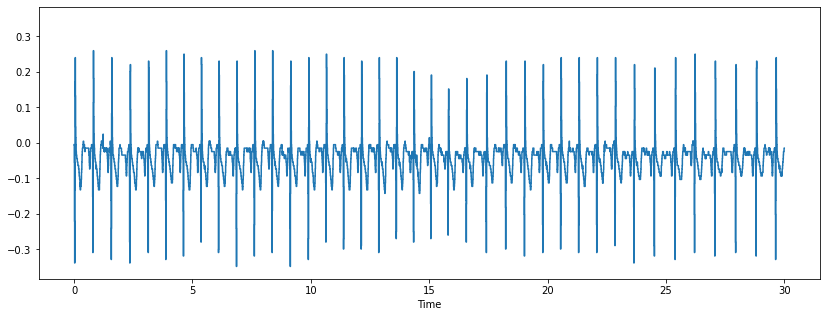

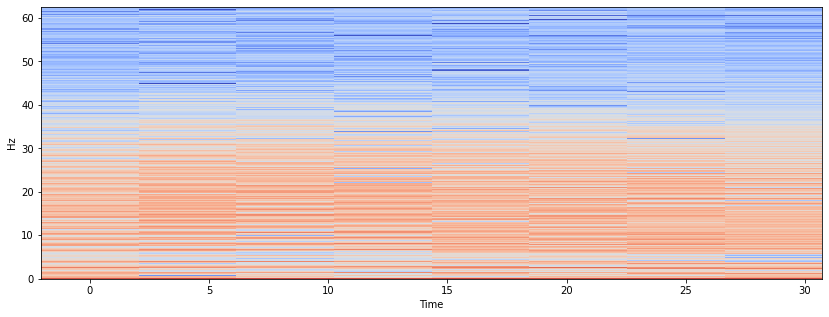

plot size (32, 30)
128.37991930823037 -34.102026516588765
0.6567598386164607 0.3317959469668225


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.05392157 -0.22058824 ... -0.0245098  -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


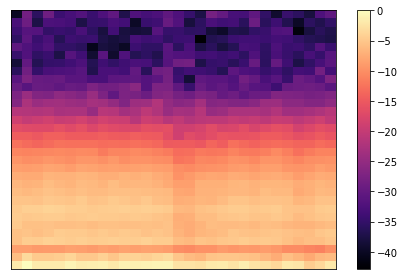

torch.Size([2, 3750])


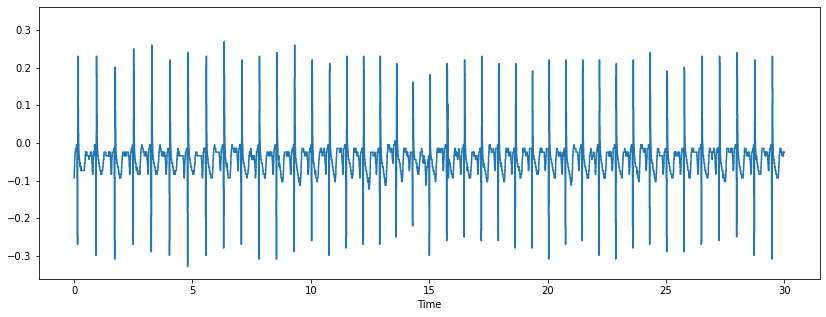

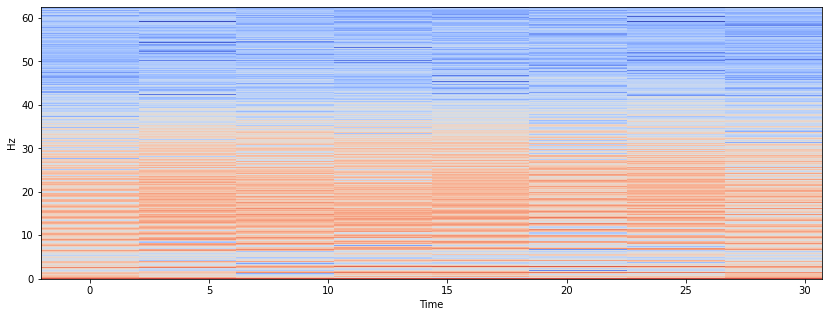

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.09313725 -0.07352941 -0.06372549 ... -0.0245098  -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
125.46186960233285 -36.265199406428295
0.6509237392046657 0.32746960118714347


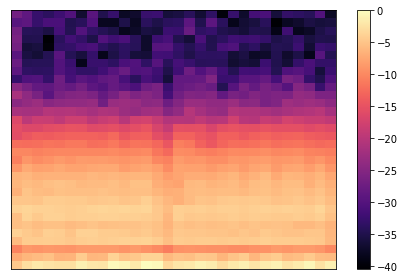

torch.Size([2, 3750])


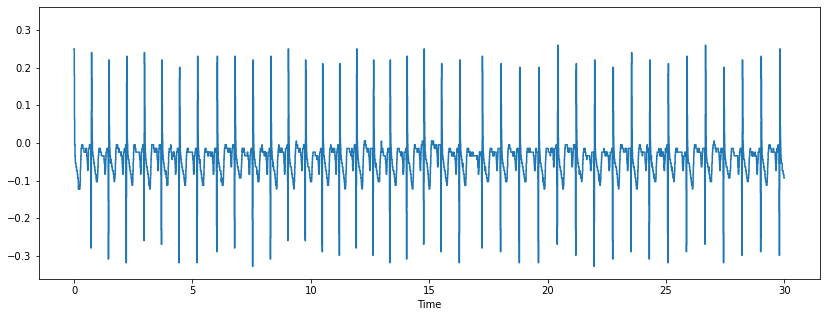

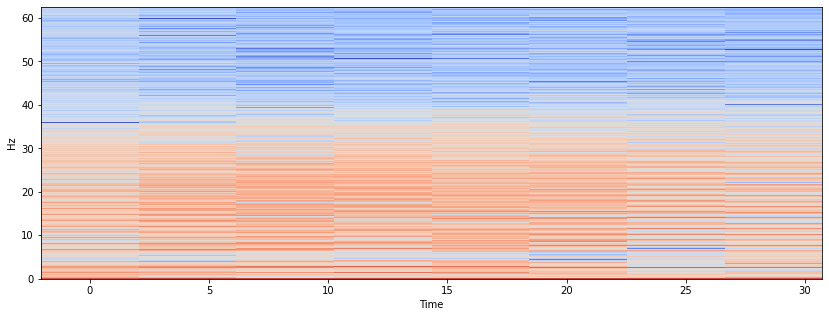

plot size (32, 30)
125.74893932257464 -30.768316182888235
0.6514978786451493 0.3384633676342235


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.25        0.18137255  0.06372549 ... -0.09313725 -0.09313725
 -0.09313725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


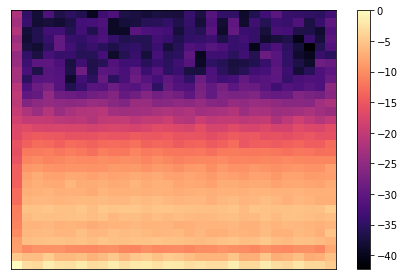

torch.Size([2, 3750])


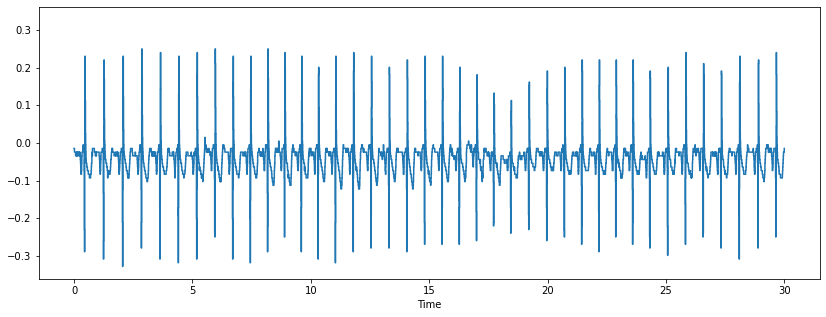

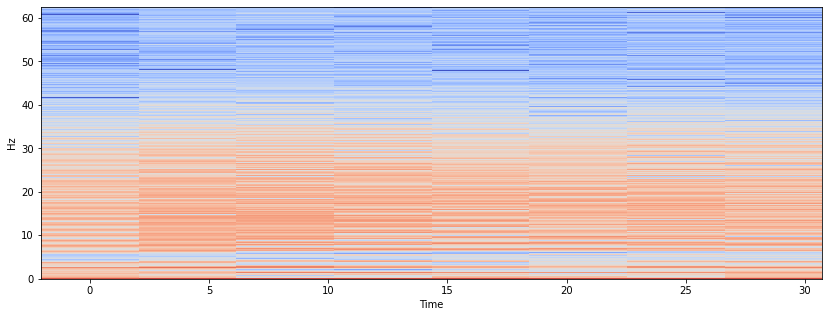

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.0245098  ... -0.0245098  -0.0245098
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
124.68103556303072 -31.77046159215086
0.6493620711260615 0.33645907681569825


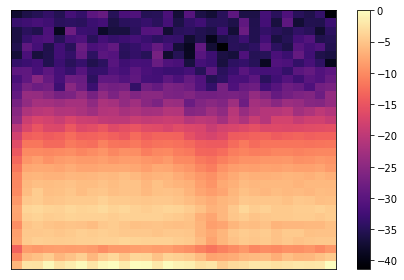

torch.Size([2, 3750])


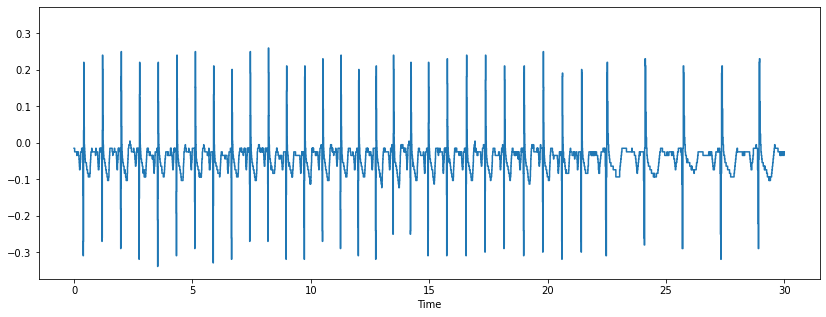

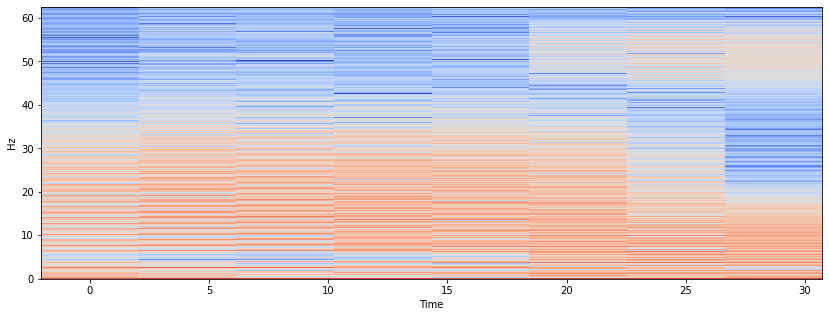

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.01470588 ... -0.03431373 -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
126.72230457041792 -40.75173005946384
0.6534446091408358 0.3184965398810723


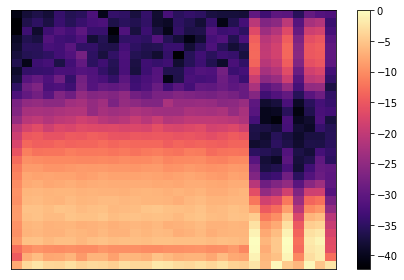

torch.Size([2, 3750])


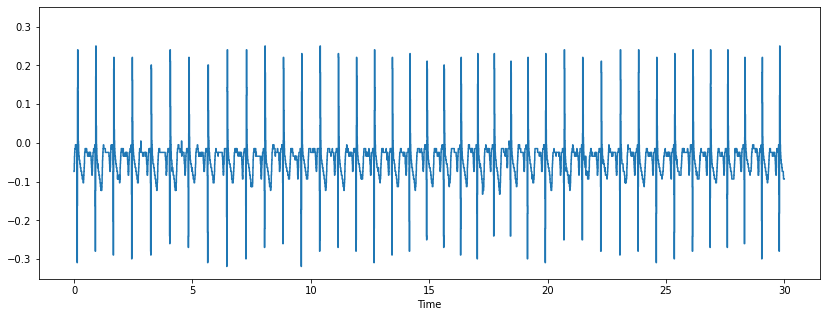

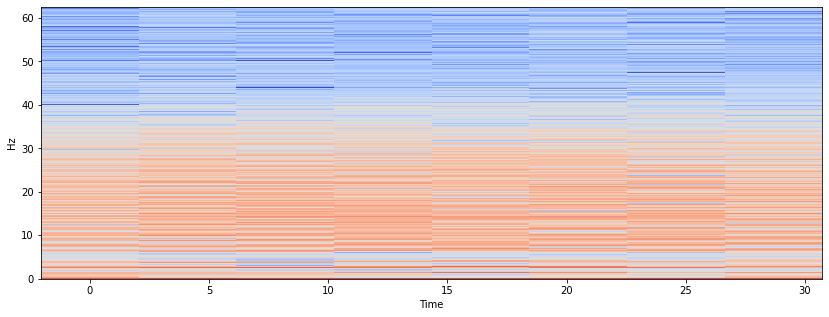

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.07352941 -0.05392157 -0.03431373 ... -0.09313725 -0.09313725
 -0.09313725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
126.02053930098631 -31.57485567950813
0.6520410786019727 0.33685028864098376


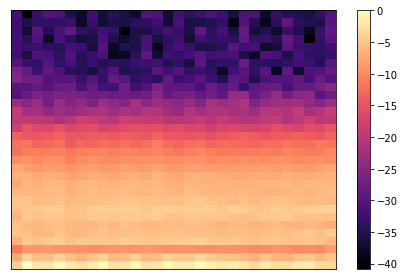

torch.Size([2, 3750])


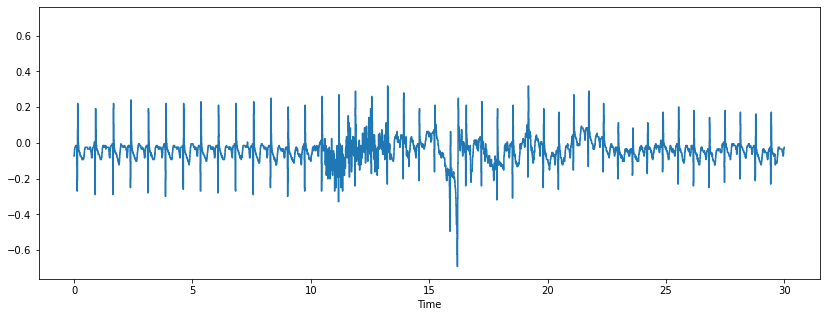

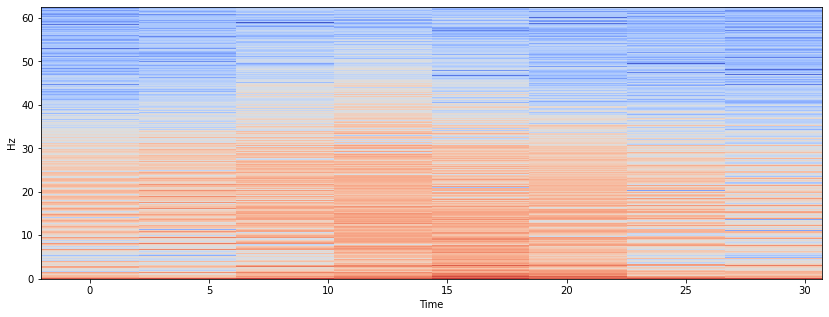

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.07352941 -0.05392157 -0.03431373 ... -0.03431373 -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
140.53017960109605 -36.16558782557823
0.6810603592021921 0.32766882434884353


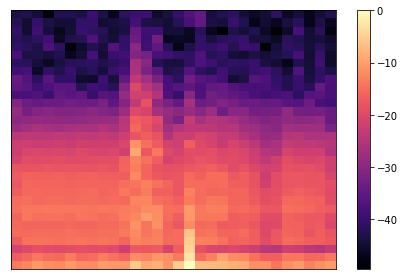

torch.Size([2, 3750])


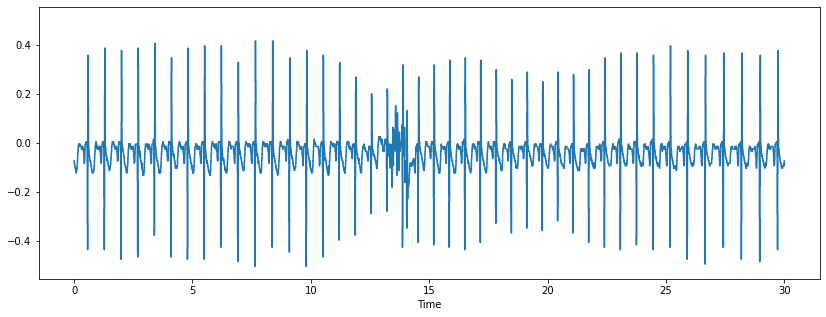

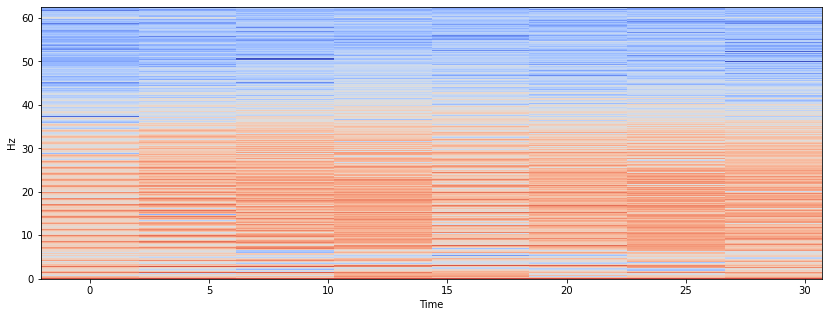

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.07352941 -0.08333333 -0.08333333 ... -0.08333333 -0.09313725
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
131.0025993607376 -45.23280611324738
0.6620051987214751 0.3095343877735053


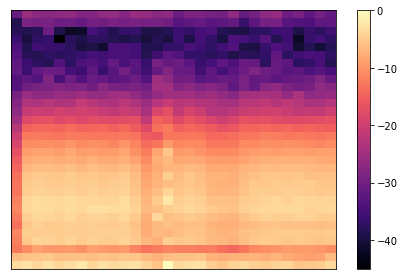

torch.Size([2, 3750])


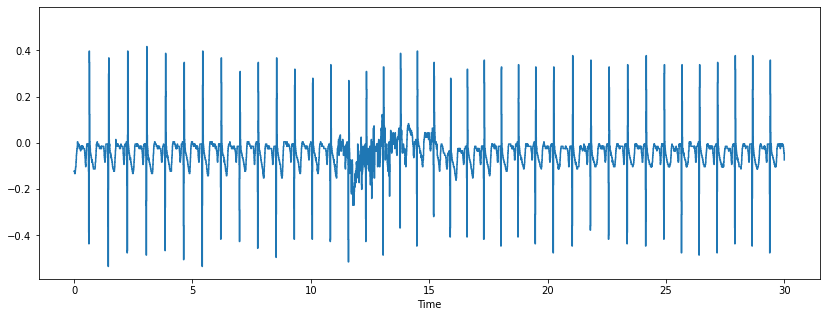

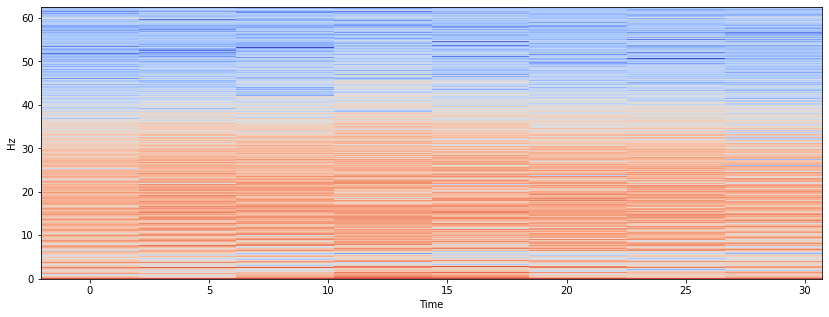

plot size (32, 30)
134.51762332157205 -43.33509994301674
0.6690352466431441 0.3133298001139665


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.12254902 -0.12254902 -0.12254902 ... -0.04411765 -0.04411765
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


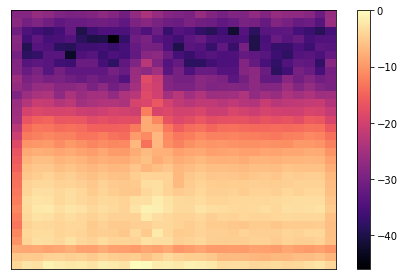

torch.Size([2, 3750])


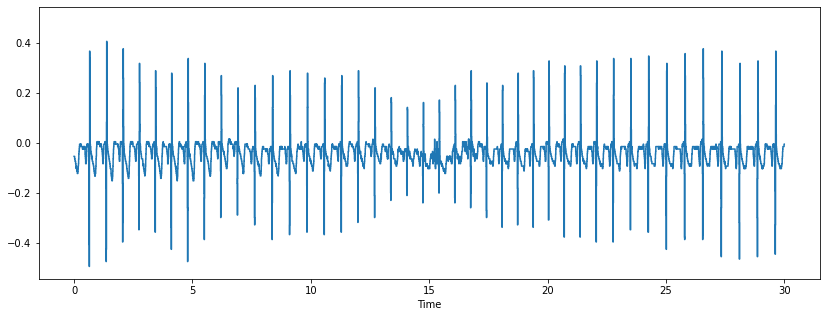

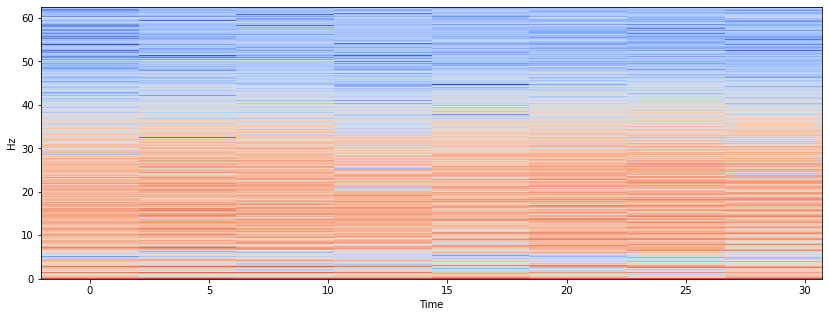

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.05392157 -0.05392157 -0.05392157 ... -0.01470588 -0.00490196
 -0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
131.16077704888647 -48.38139564415186
0.6623215540977729 0.3032372087116963


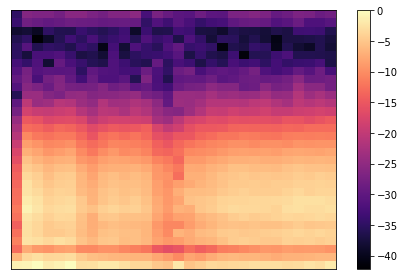

torch.Size([2, 3750])


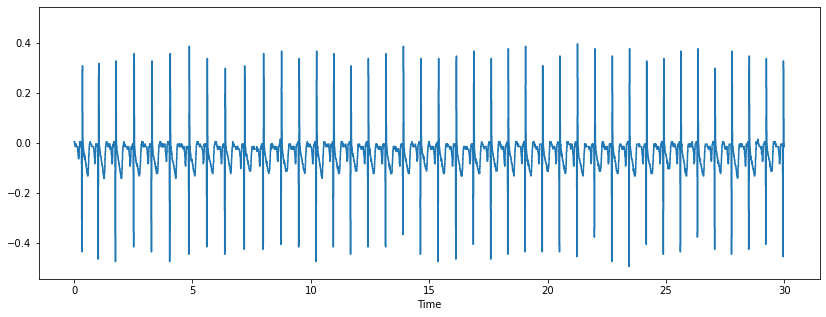

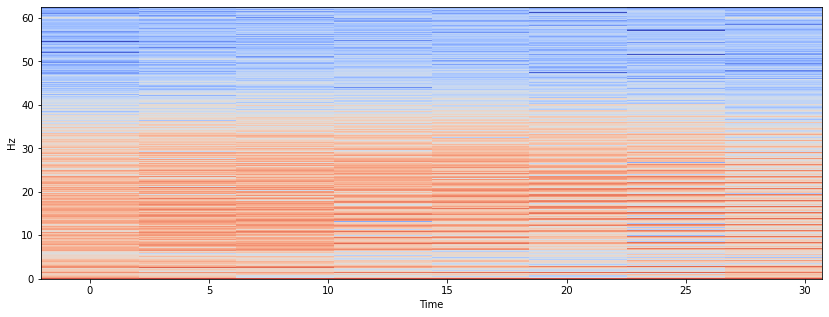

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.00490196  0.00490196  0.00490196 ... -0.00490196 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
132.24824035089756 -46.78090396275715
0.6644964807017951 0.3064381920744857


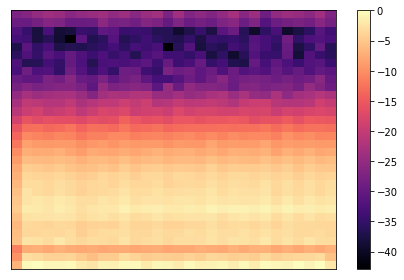

torch.Size([2, 3750])


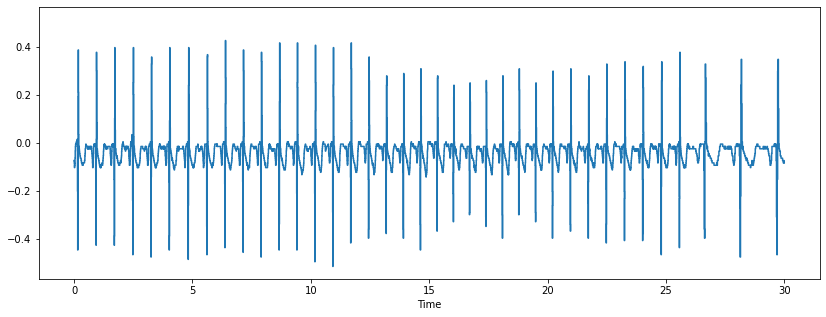

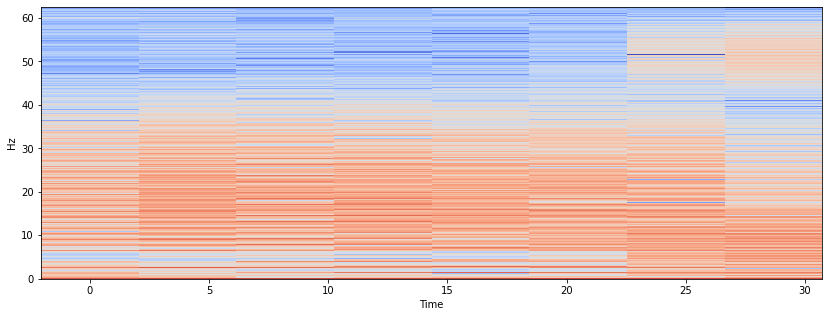

plot size (32, 30)
144.92907769289525 -45.09929610325648
0.6898581553857905 0.309801407793487


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.07352941 -0.08333333 -0.10294118 ... -0.07352941 -0.08333333
 -0.08333333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


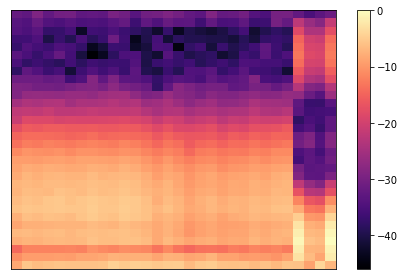

torch.Size([2, 3750])


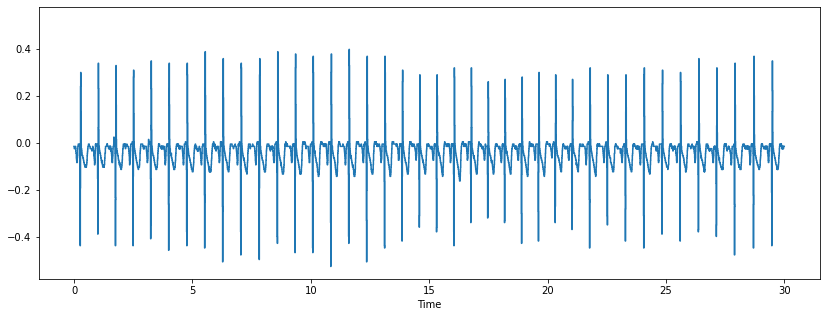

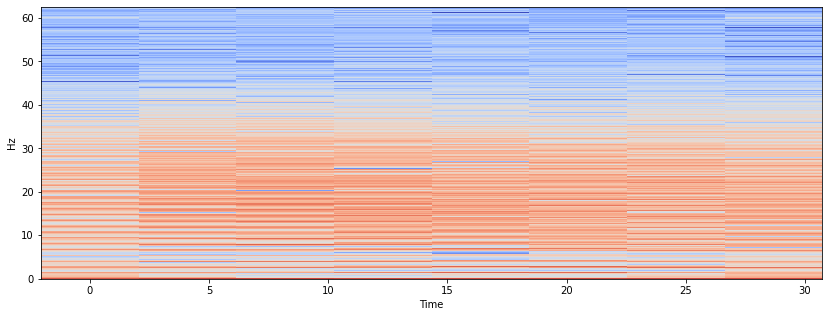

plot size (32, 30)
129.56478810655437 -45.067997351327435
0.6591295762131087 0.3098640052973451


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.0245098  -0.0245098  ... -0.01470588 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


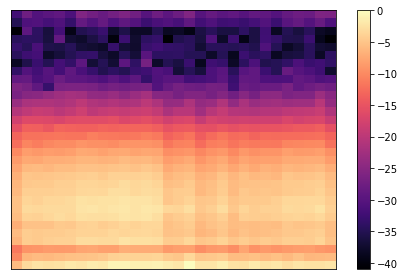

torch.Size([2, 3750])


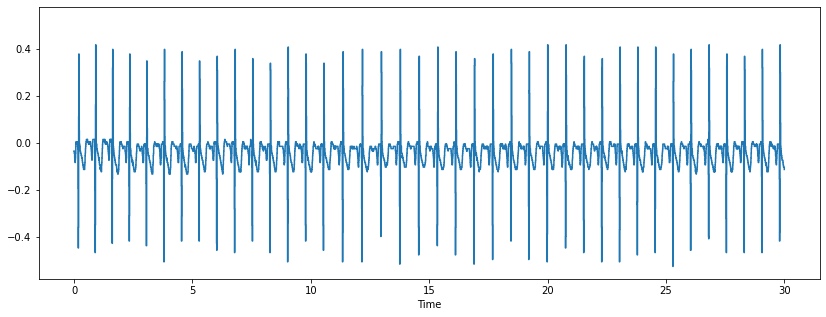

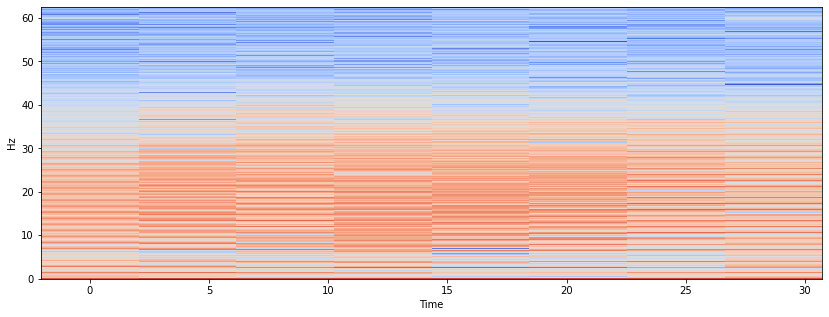

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.04411765 -0.04411765 ... -0.10294118 -0.10294118
 -0.1127451 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
132.5089725113775 -45.221825236910036
0.6650179450227549 0.30955634952617994


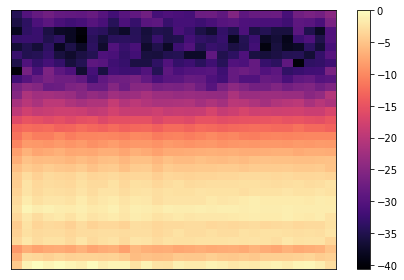

torch.Size([2, 3750])


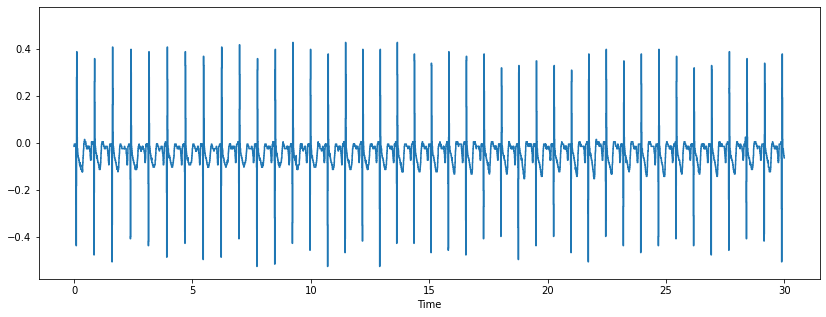

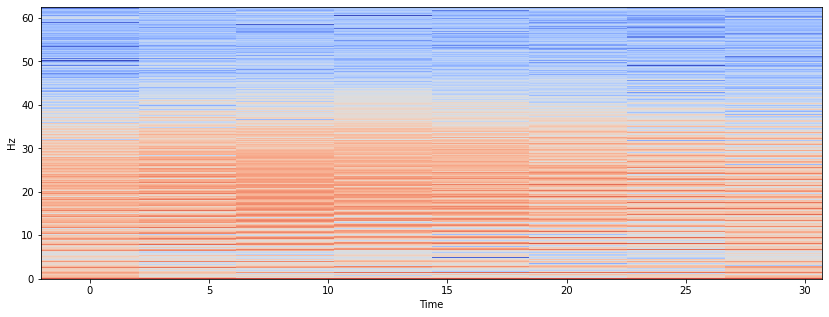

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.00490196 -0.00490196 ... -0.05392157 -0.06372549
 -0.06372549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
133.1859792664377 -47.992446842648306
0.6663719585328753 0.3040151063147034


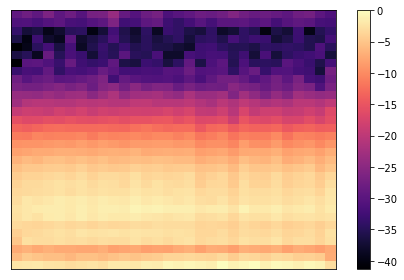

torch.Size([2, 3750])


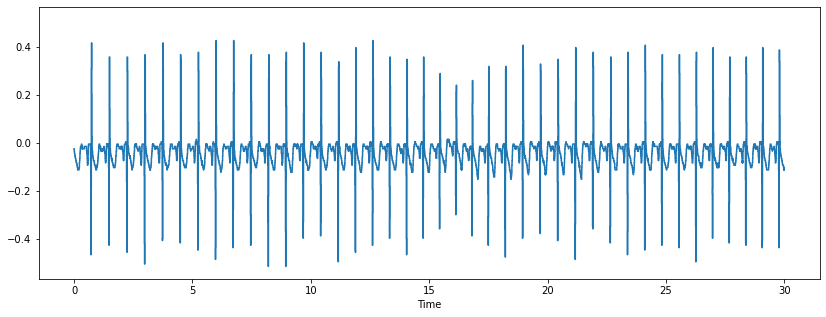

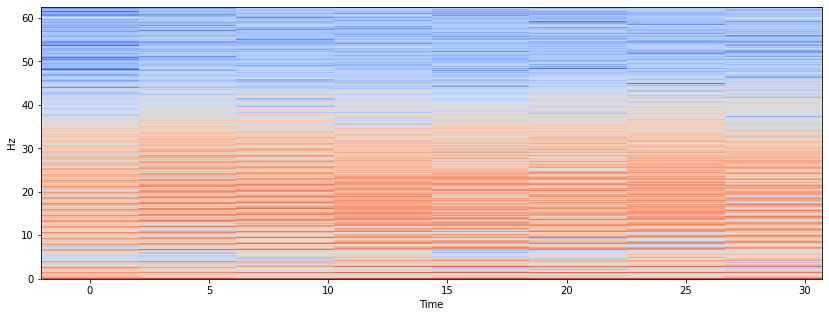

plot size (32, 30)
133.57839465004838 -45.10999001910922
0.6671567893000968 0.3097800199617816


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.0245098  -0.03431373 -0.04411765 ... -0.10294118 -0.1127451
 -0.10294118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


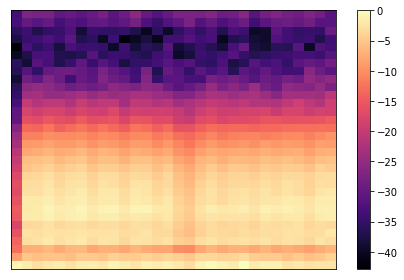

torch.Size([2, 3750])


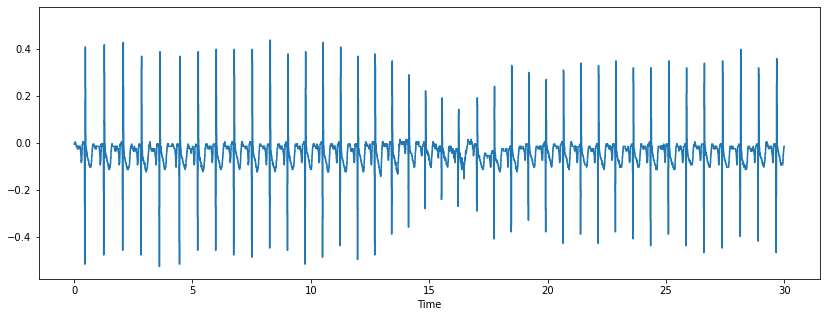

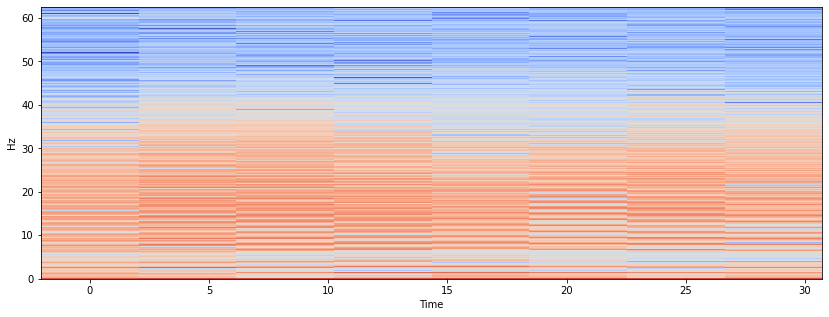

plot size (32, 30)
136.18060366915813 -45.45230547762419
0.6723612073383163 0.30909538904475165


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.00490196 ... -0.01470588 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


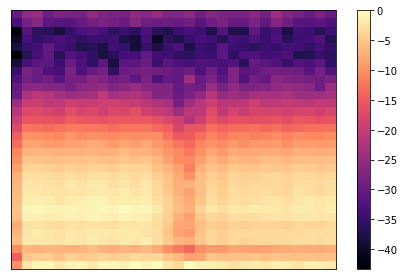

torch.Size([2, 3750])


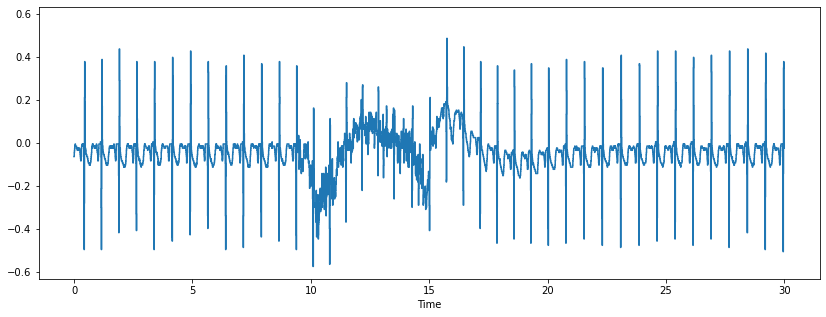

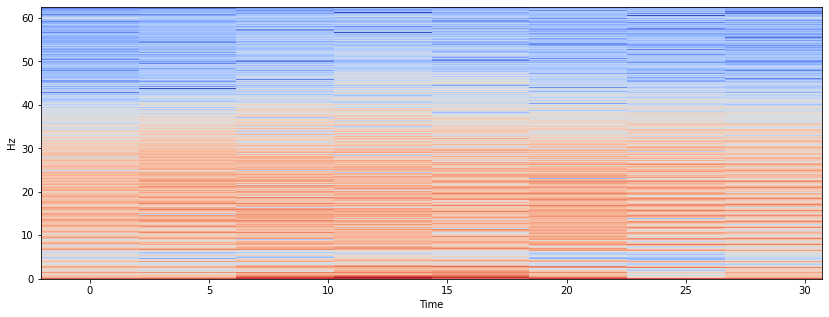

plot size (32, 30)
143.0586348902598 -50.67877719253754
0.6861172697805196 0.2986424456149249


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.06372549 -0.04411765 -0.03431373 ...  0.15196078  0.00490196
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


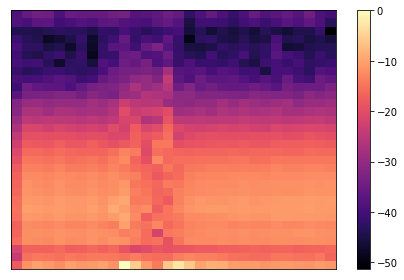

torch.Size([2, 3750])


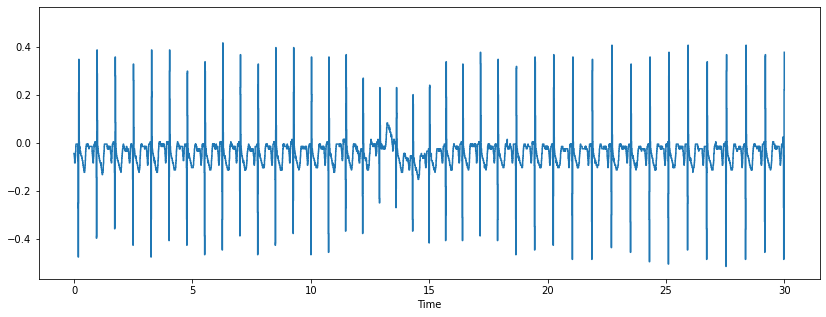

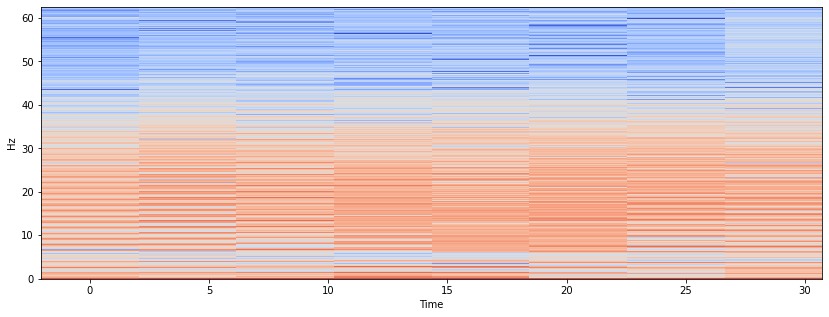

plot size (32, 30)
127.25481323512113 -43.715959707846196
0.6545096264702422 0.31256808058430763


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.04411765 -0.05392157 -0.06372549 ... -0.28921569  0.22058824
  0.37745098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


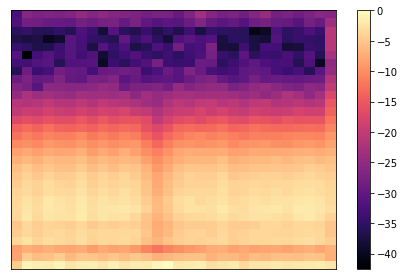

torch.Size([2, 3750])


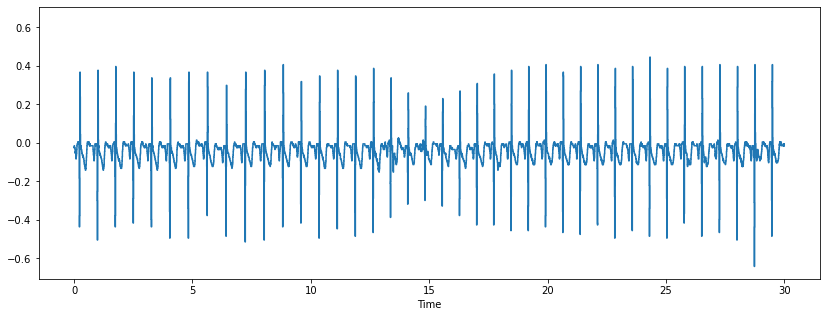

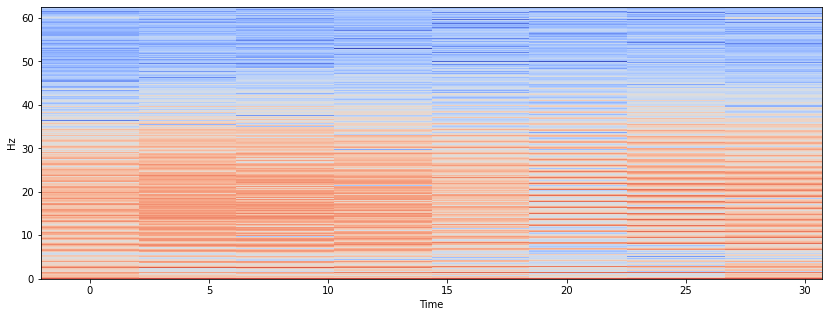

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.0245098  -0.01470588 -0.0245098  ... -0.01470588 -0.00490196
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
135.54050932134092 -45.95284286878373
0.6710810186426818 0.30809431426243256


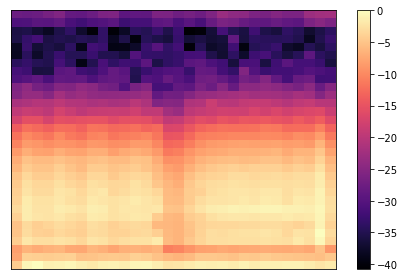

torch.Size([2, 3750])


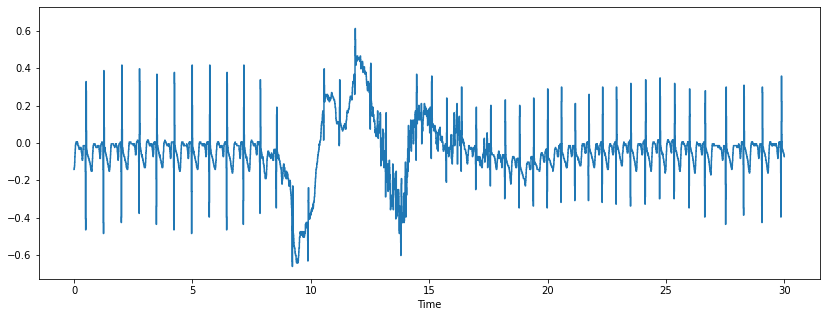

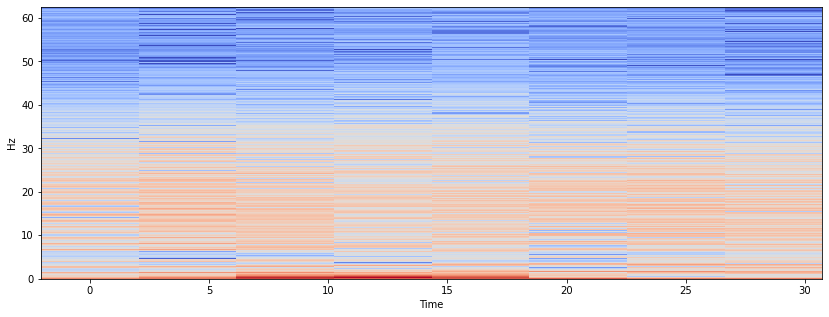

plot size (32, 30)
133.67623971846686 -40.59251516171708
0.6673524794369337 0.31881496967656586


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.14215686 -0.13235294 -0.12254902 ... -0.06372549 -0.07352941
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


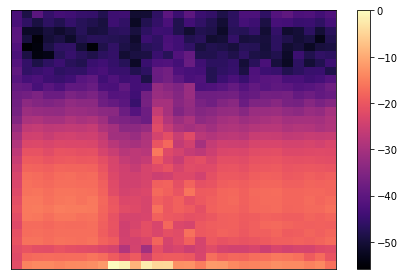

torch.Size([2, 3750])


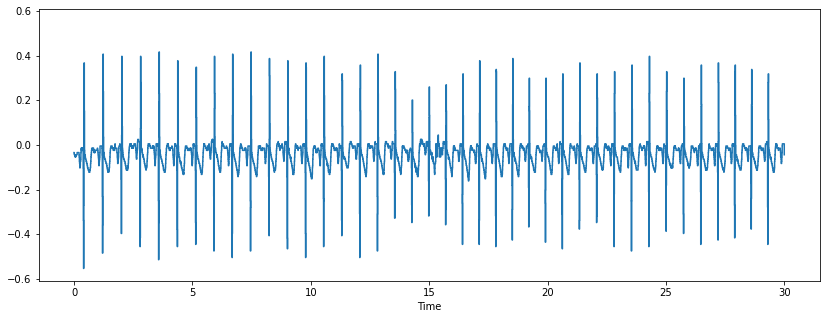

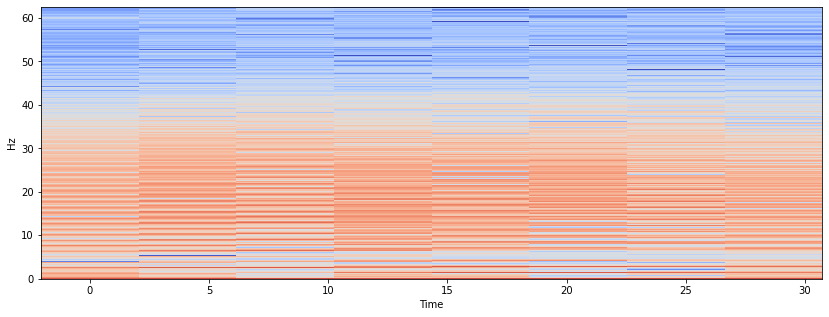

plot size (32, 30)
134.1198870821895 -46.5000775969356
0.668239774164379 0.3069998448061288


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.04411765 -0.04411765 ...  0.00490196  0.00490196
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


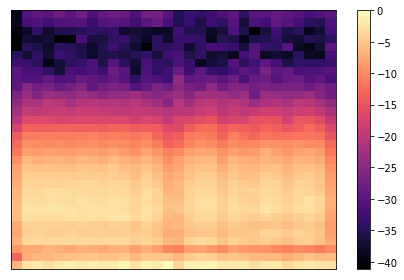

torch.Size([2, 3750])


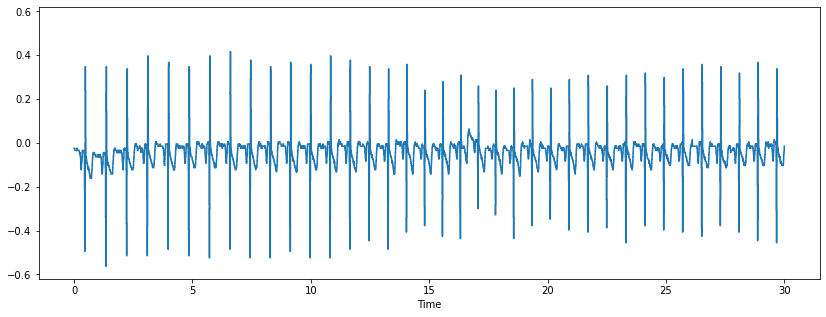

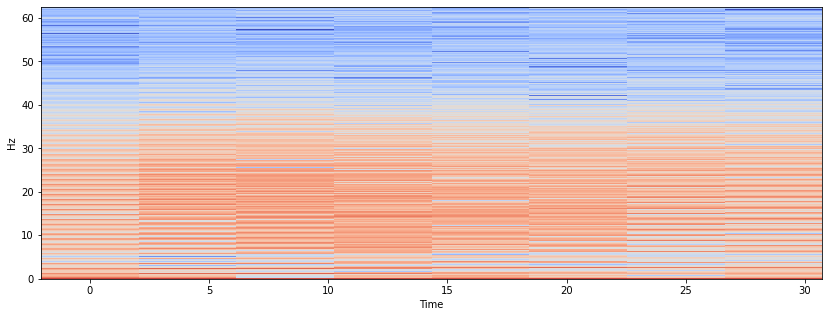

plot size (32, 30)
133.9167759503475 -42.148965785120566
0.667833551900695 0.31570206842975884


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.0245098  -0.0245098  -0.0245098  ... -0.04411765 -0.03431373
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


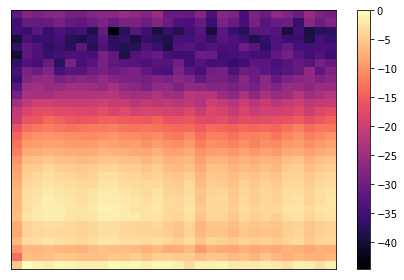

torch.Size([2, 3750])


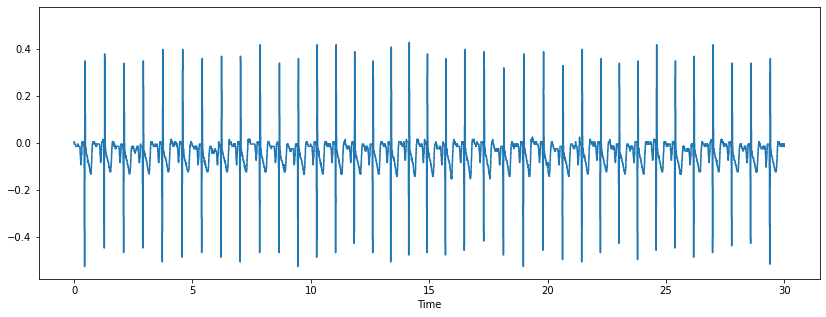

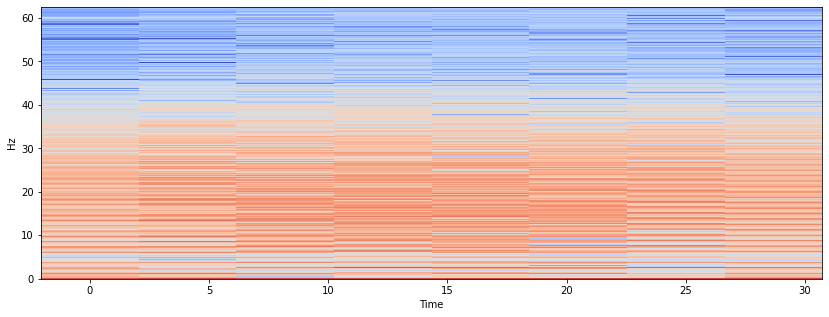

plot size (32, 30)
138.17012372295147 -46.39785747167946
0.6763402474459029 0.3072042850566411


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.00490196 -0.00490196 -0.00490196 ... -0.01470588 -0.00490196
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


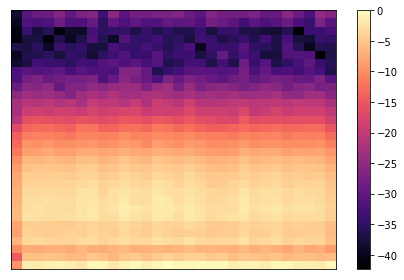

torch.Size([2, 3750])


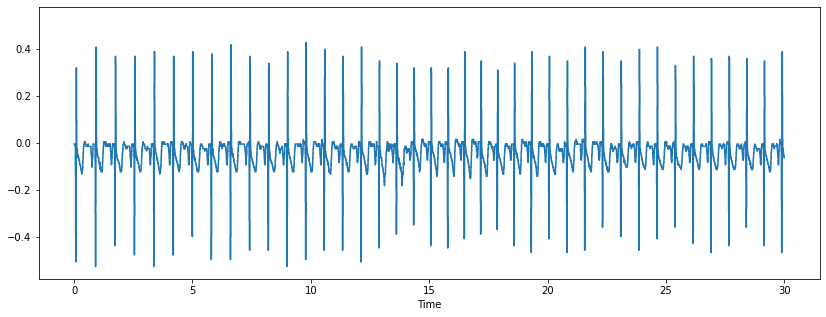

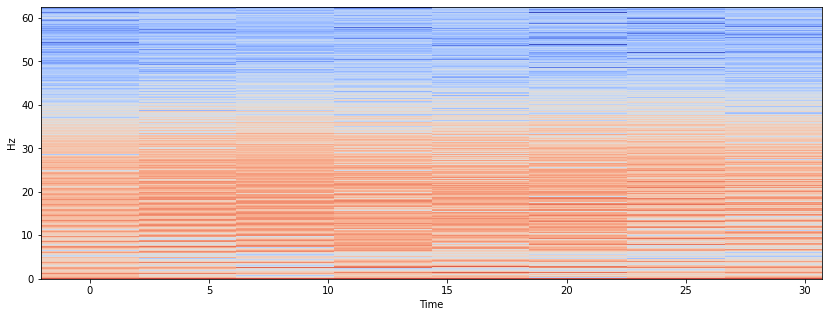

plot size (32, 30)
135.83060512384594 -48.01823163455069
0.6716612102476919 0.3039635367308986


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.00490196 ... -0.05392157 -0.06372549
 -0.06372549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


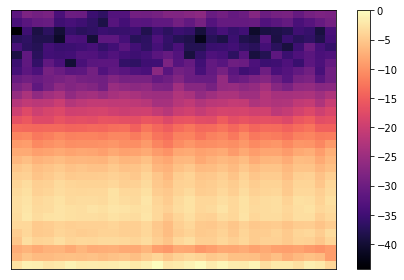

torch.Size([2, 3750])


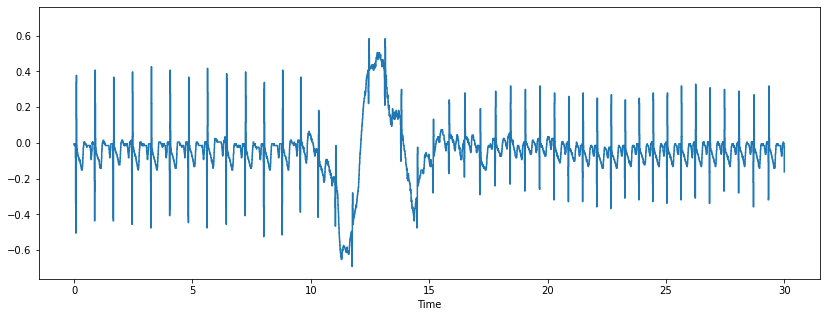

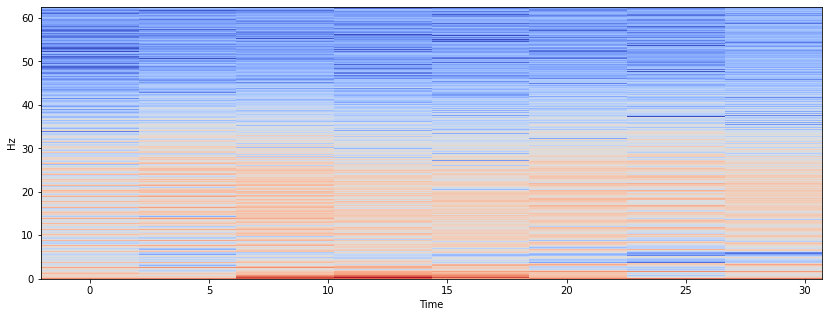

plot size (32, 30)
135.23749913347837 -45.35045782455471
0.6704749982669568 0.30929908435089054


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.01470588 -0.01470588 ... -0.00490196 -0.0245098
 -0.16176471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


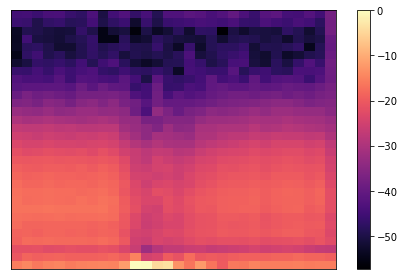

torch.Size([2, 3750])


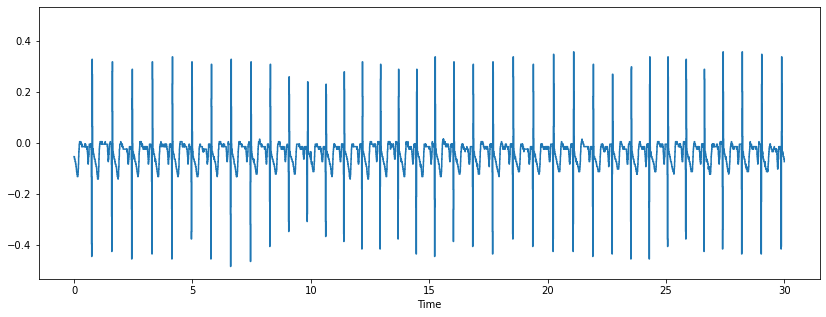

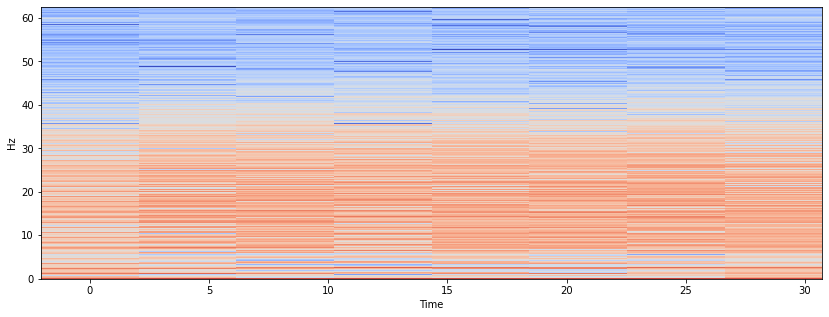

plot size (32, 30)
129.35792819550724 -40.91041367402724
0.6587158563910145 0.3181791726519455


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.05392157 -0.05392157 -0.06372549 ... -0.06372549 -0.06372549
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


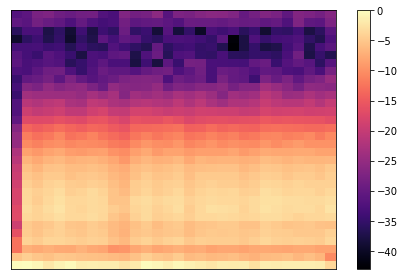

torch.Size([2, 3750])


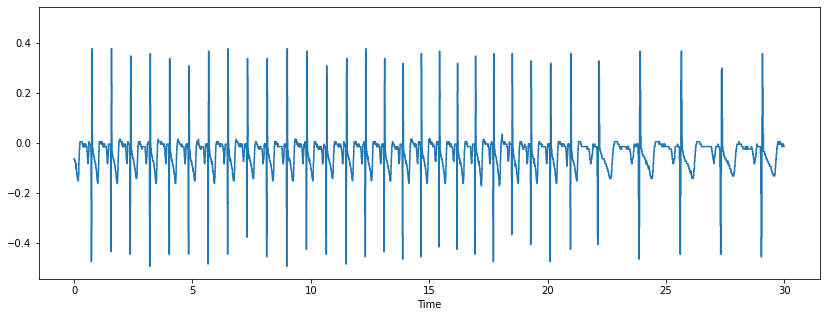

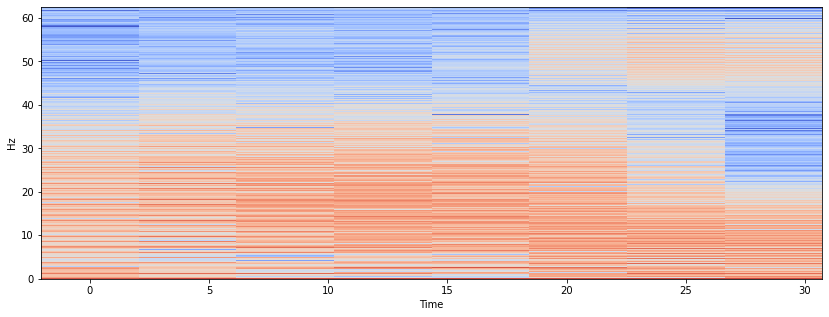

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.06372549 -0.06372549 -0.06372549 ... -0.01470588 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
149.01015054747978 -52.641952767503454
0.6980203010949596 0.2947160944649931


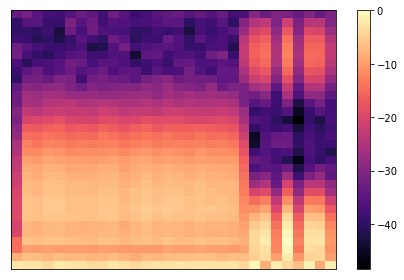

torch.Size([2, 3750])


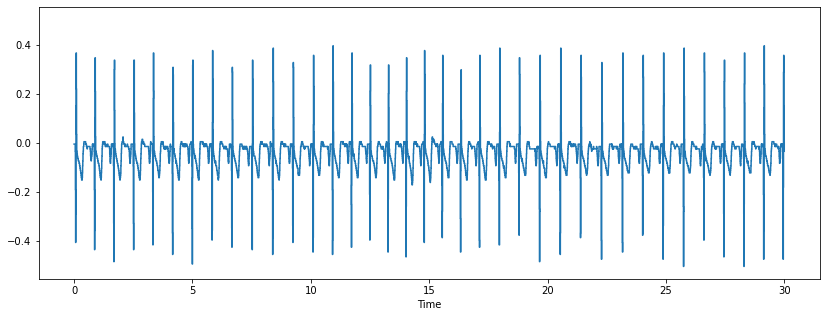

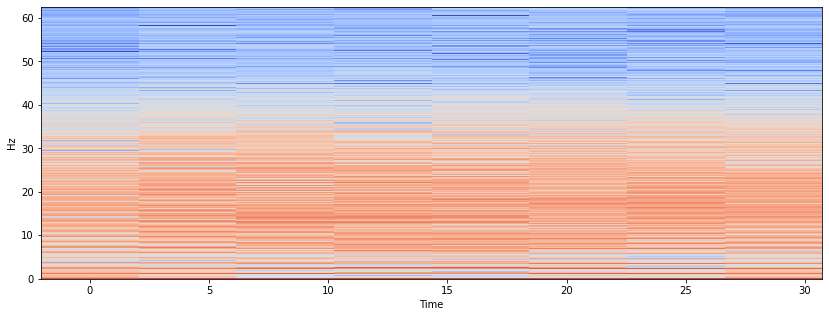

plot size (32, 30)
139.1894388900891 -43.592174251880834
0.6783788777801781 0.31281565149623836


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.00490196 ...  0.15196078  0.00490196
 -0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


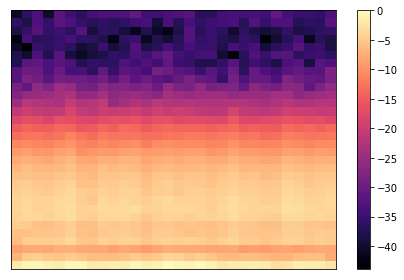

torch.Size([2, 3750])


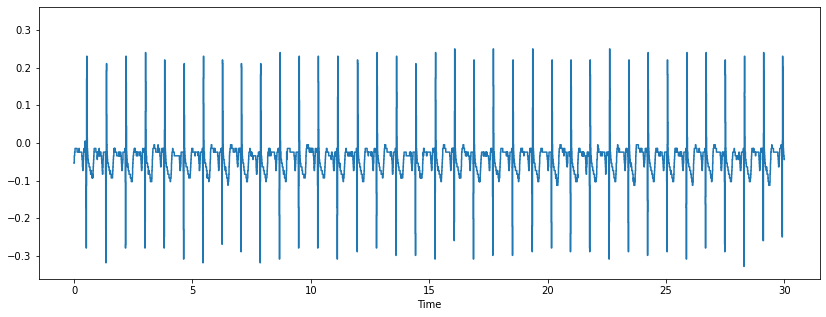

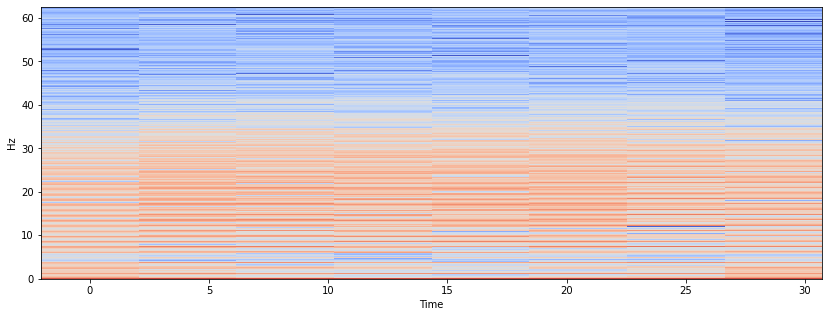

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.05392157 -0.03431373 -0.03431373 ... -0.03431373 -0.04411765
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
127.12476417416553 -34.852071481366664
0.654249528348331 0.33029585703726666


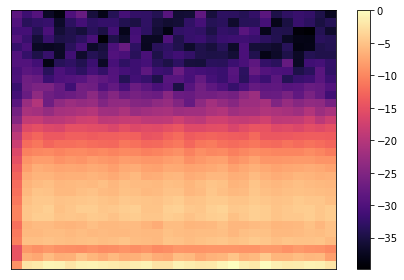

torch.Size([2, 3750])


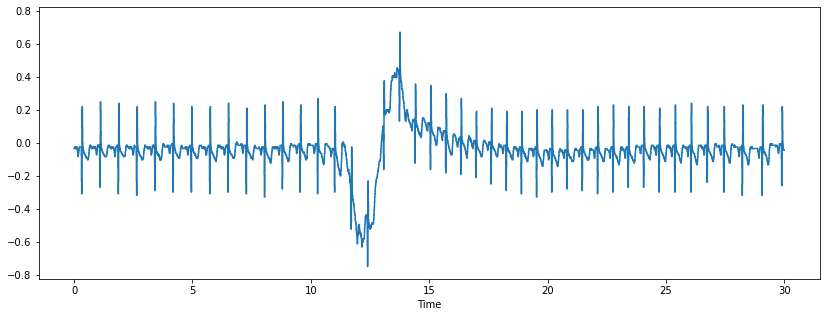

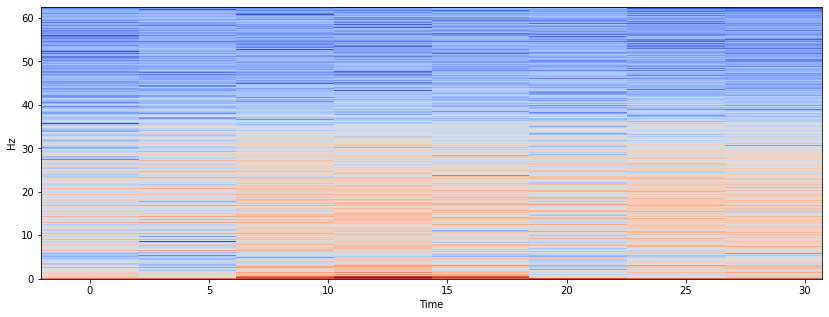

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.03431373 -0.03431373 ... -0.04411765 -0.04411765
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
138.52425614229196 -30.398945738193568
0.677048512284584 0.3392021085236129


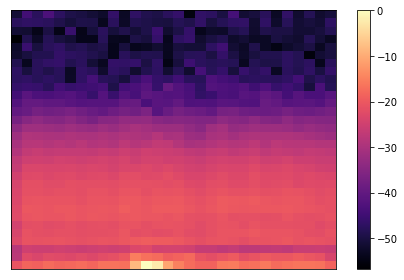

torch.Size([2, 3750])


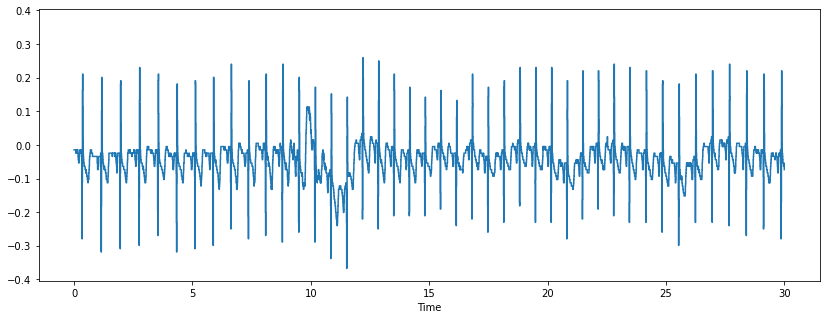

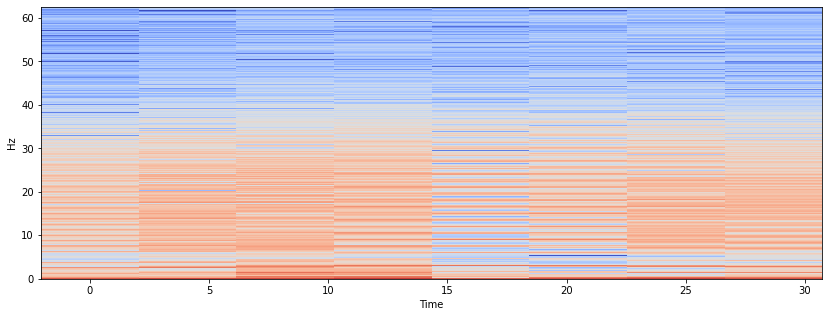

plot size (32, 30)
128.3440593409045 -32.13566037621585
0.656688118681809 0.3357286792475683


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.01470588 ... -0.05392157 -0.06372549
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


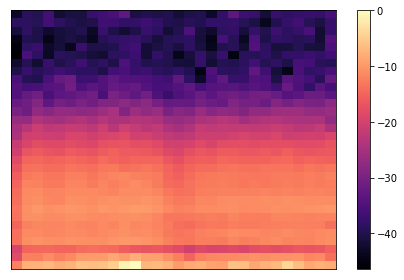

torch.Size([2, 3750])


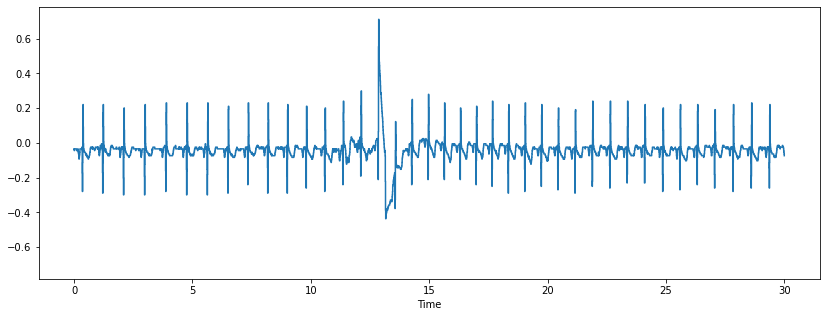

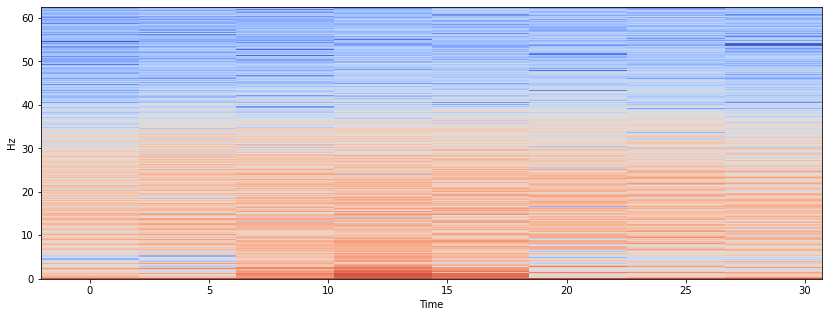

plot size (32, 30)
139.49011431592146 -35.173340333686035
0.6789802286318429 0.3296533193326279


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.04411765 -0.03431373 ... -0.05392157 -0.06372549
 -0.07352941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


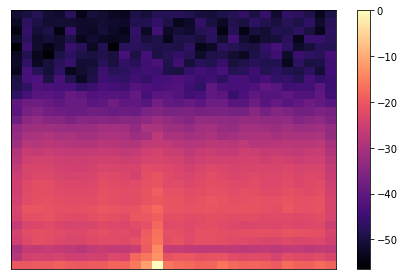

torch.Size([2, 3750])


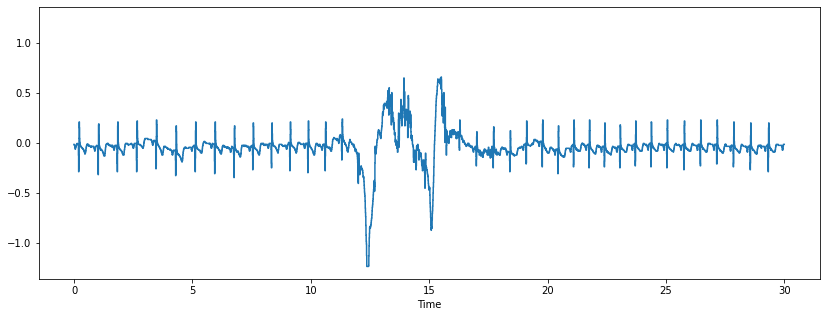

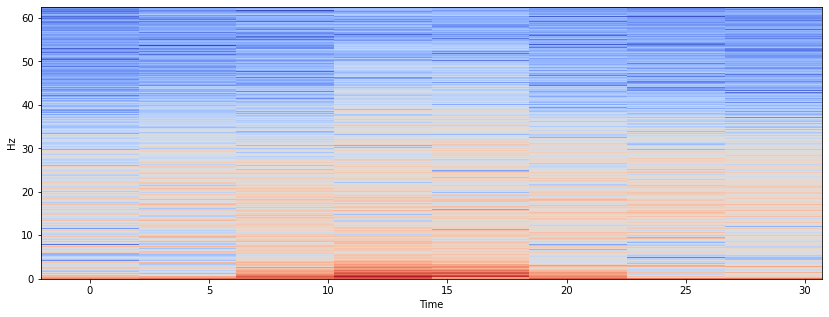

plot size (32, 30)
134.65329526786056 -32.38636860711617
0.6693065905357212 0.33522726278576764


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.0245098  -0.0245098  ... -0.01470588 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


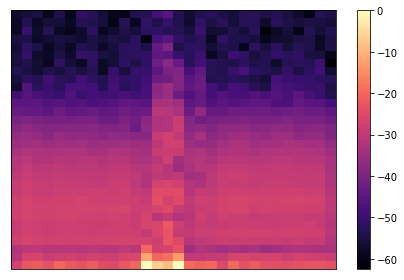

torch.Size([2, 3750])


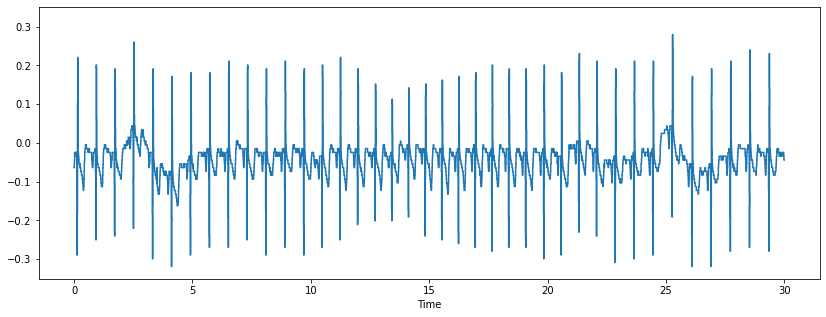

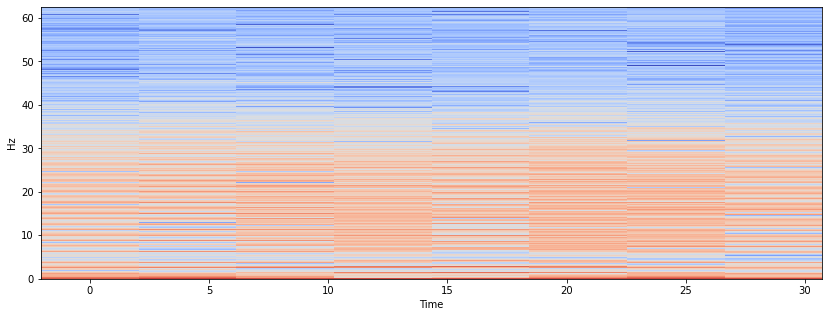

plot size (32, 30)
119.9902989881508 -31.38655006985971
0.6399805979763016 0.3372268998602806


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.06372549 -0.05392157 -0.04411765 ... -0.04411765 -0.04411765
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


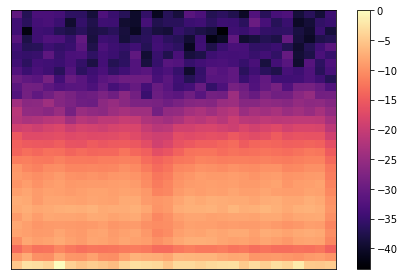

torch.Size([2, 3750])


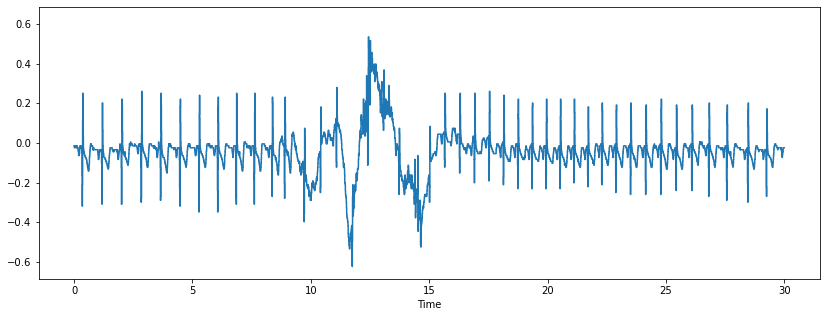

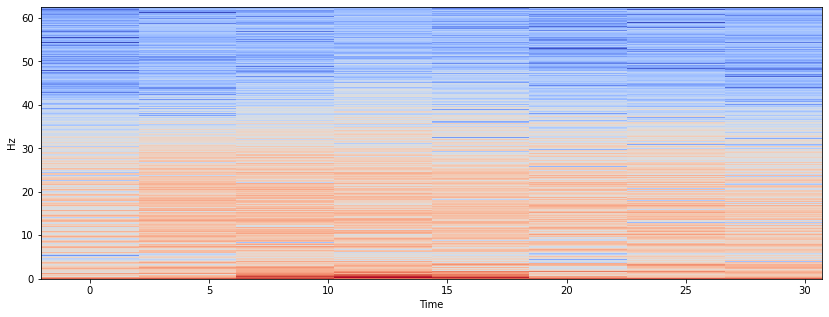

plot size (32, 30)
131.29442808356237 -33.228604362184896
0.6625888561671247 0.3335427912756302


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.0245098  ... -0.0245098  -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


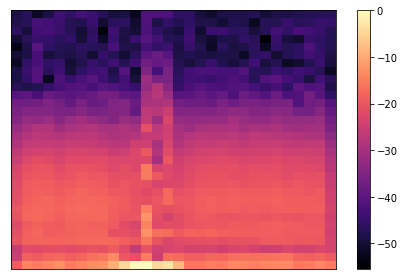

torch.Size([2, 3750])


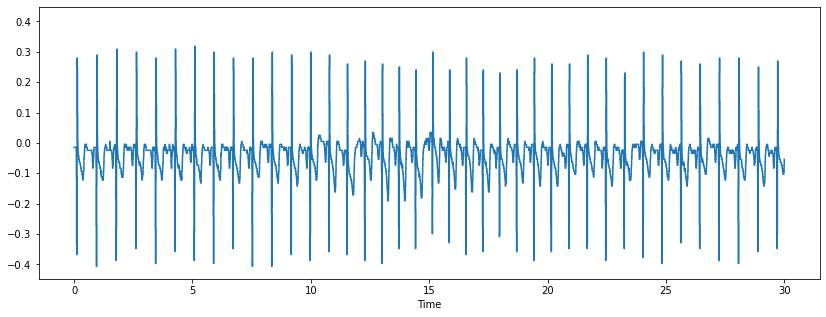

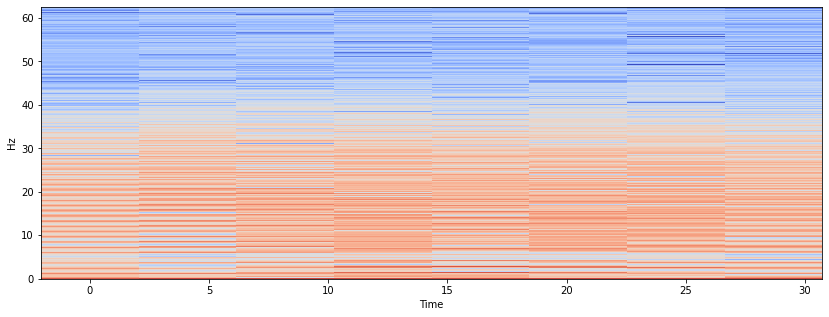

plot size (32, 30)
134.86616197219865 -35.16414929851079
0.6697323239443973 0.32967170140297847


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.01470588 ... -0.09313725 -0.07352941
 -0.05392157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


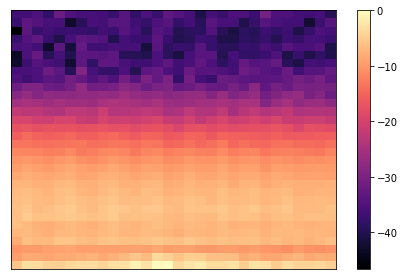

torch.Size([2, 3750])


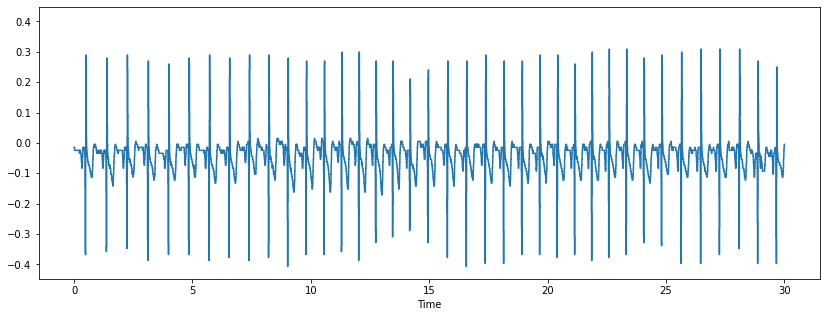

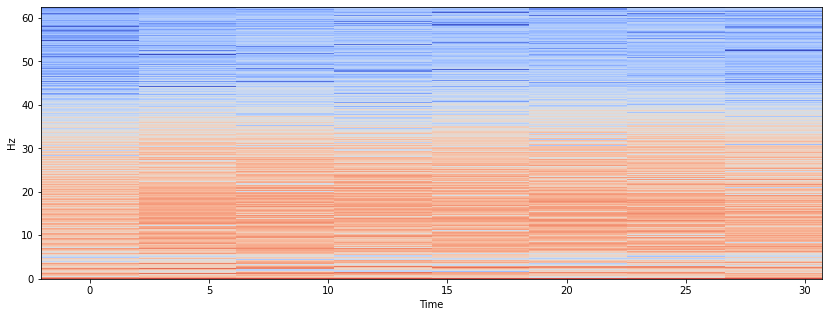

plot size (32, 30)
138.44921768633338 -36.99871849358939
0.6768984353726668 0.3260025630128212


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.01470588 ... -0.0245098  -0.01470588
 -0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


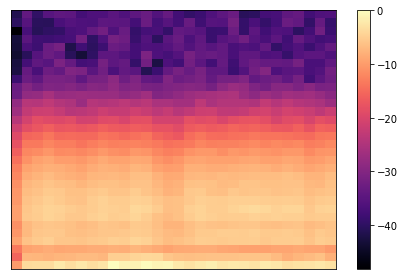

torch.Size([2, 3750])


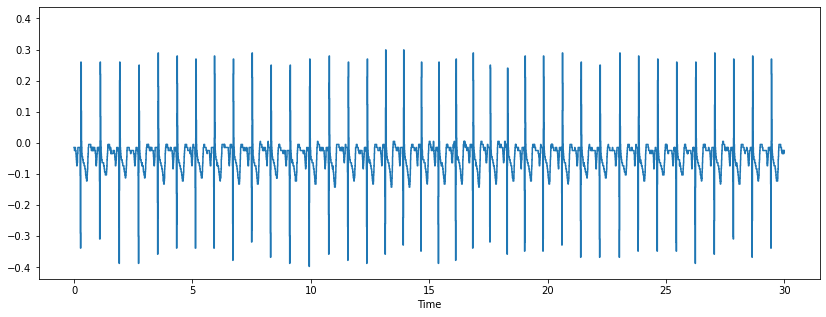

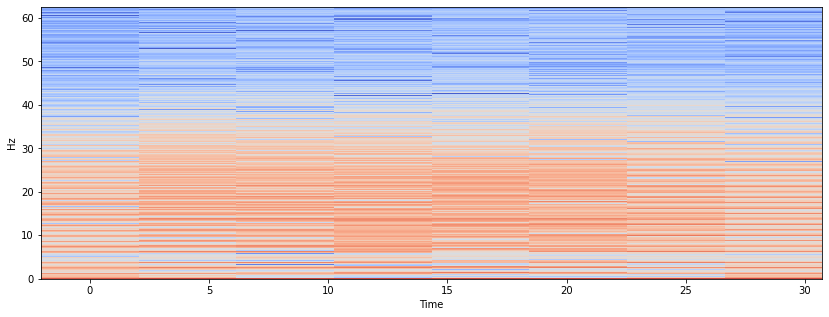

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.0245098  ... -0.0245098  -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
133.8009806233496 -35.60883017544814
0.6676019612466991 0.32878233964910375


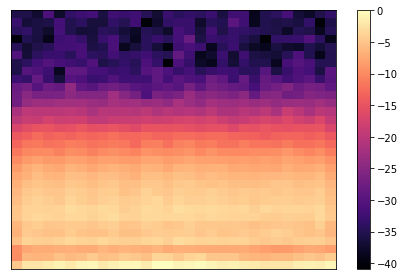

torch.Size([2, 3750])


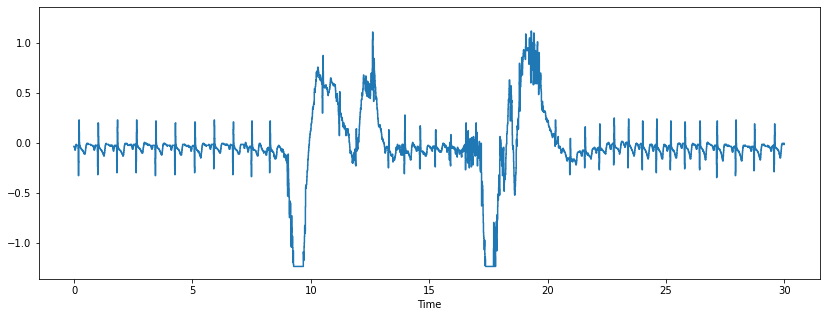

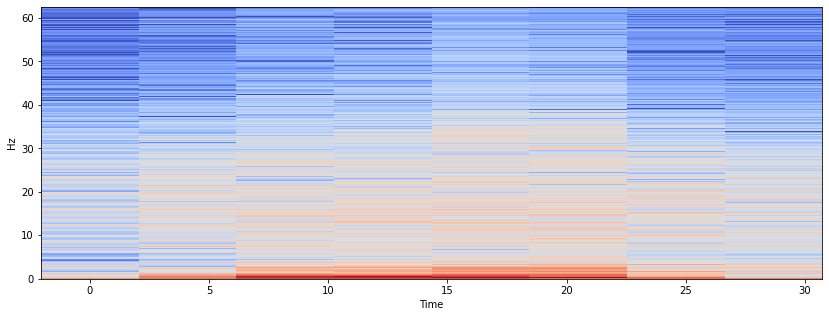

plot size (32, 30)
165.40762967448813 -32.08563044399276
0.7308152593489763 0.3358287391120145


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.04411765 -0.04411765 ... -0.01470588 -0.00490196
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


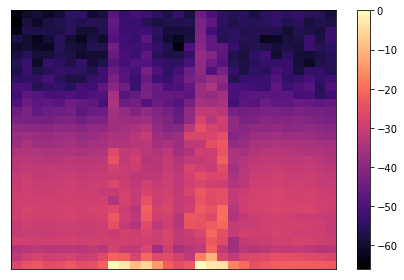

torch.Size([2, 3750])


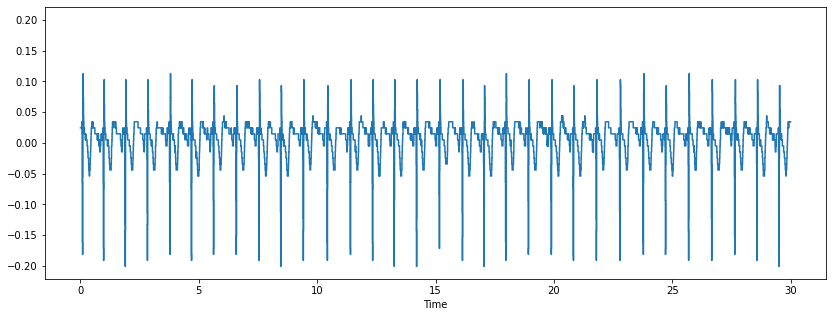

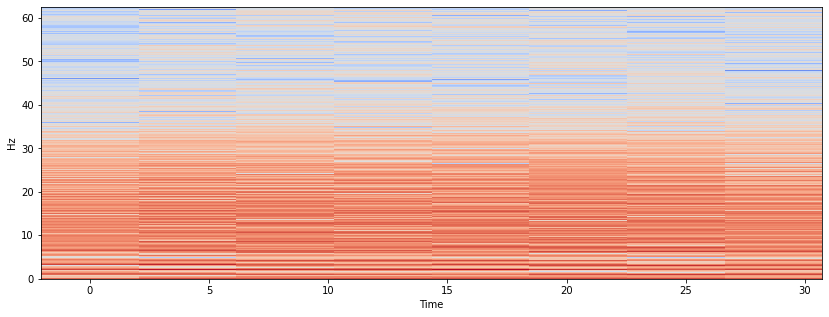

plot size (32, 30)
126.43323775462498 -22.895916489133796
0.65286647550925 0.35420816702173236


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.0245098  0.0245098  0.0245098  ... 0.03431373 0.03431373 0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


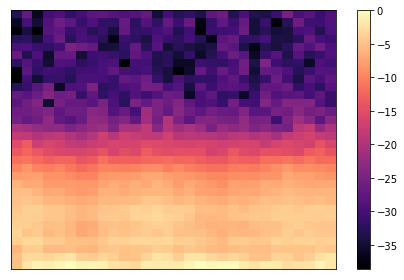

torch.Size([2, 3750])


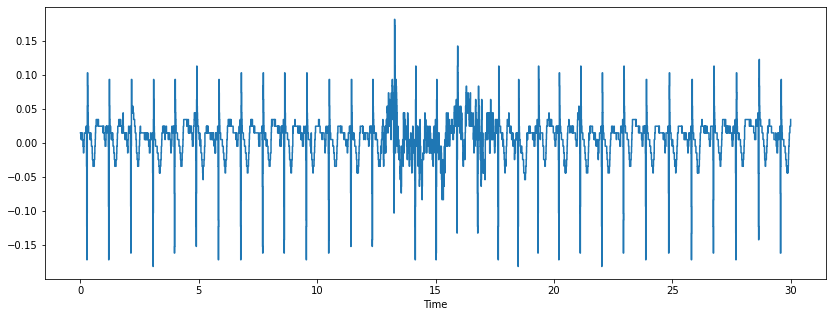

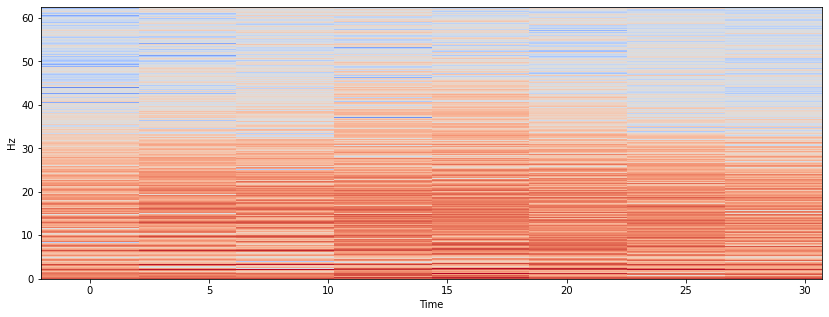

plot size (32, 30)
115.30607518010086 -21.18966575936612
0.6306121503602017 0.3576206684812678


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.01470588 0.01470588 0.01470588 ... 0.0245098  0.0245098  0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


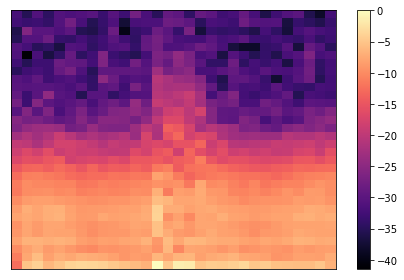

torch.Size([2, 3750])


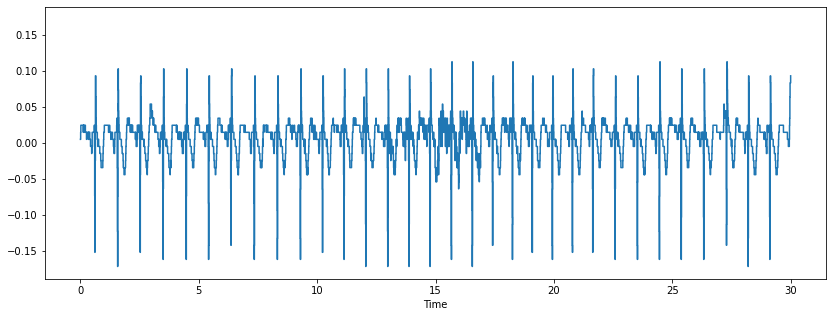

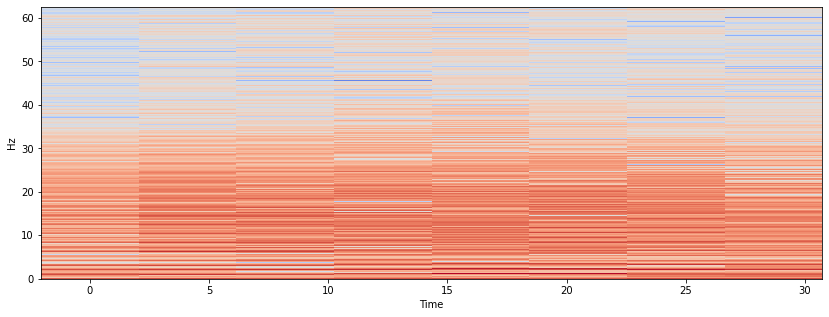

plot size (32, 30)
113.47933689651651 -23.33509411746023
0.626958673793033 0.3533298117650795


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.00490196 0.01470588 0.0245098  ... 0.08333333 0.08333333 0.09313725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


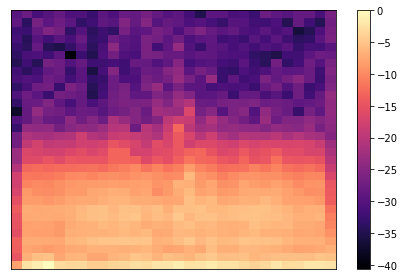

torch.Size([2, 3750])


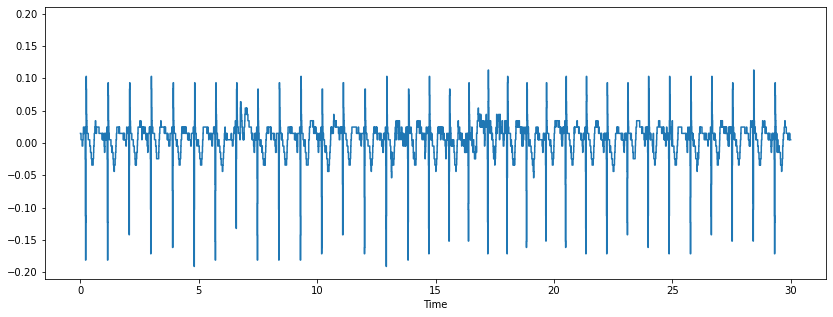

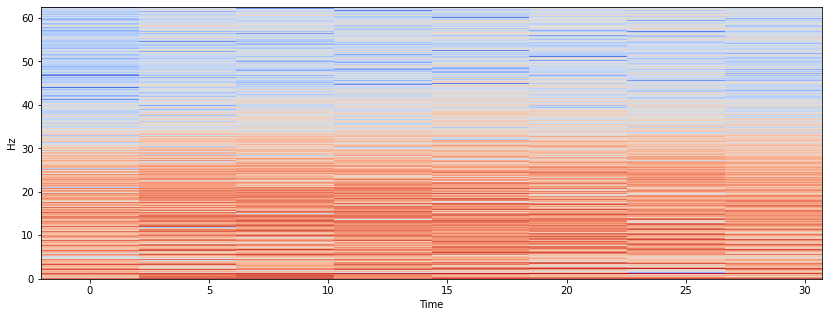

plot size (32, 30)
115.54794037263595 -24.92248259521059
0.6310958807452719 0.3501550348095788


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.01470588 0.01470588 0.01470588 ... 0.00490196 0.00490196 0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


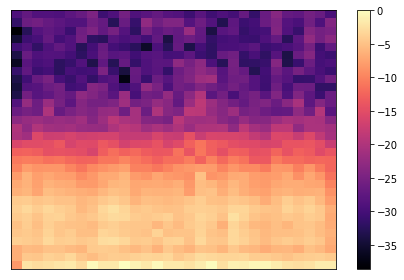

torch.Size([2, 3750])


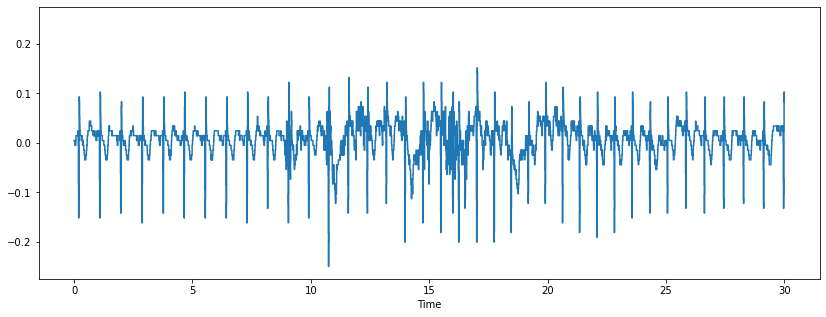

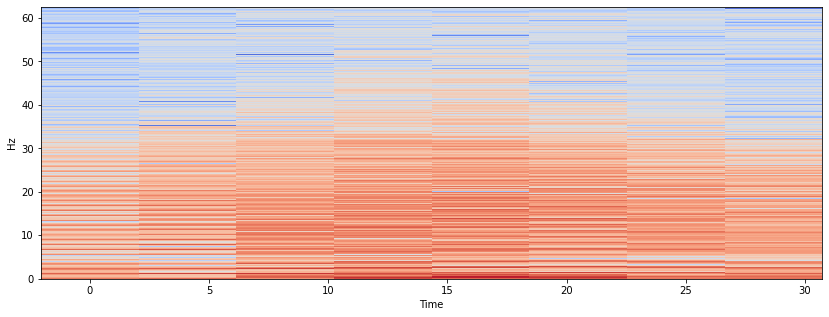

plot size (32, 30)
111.22168896376172 -22.918570618428753
0.6224433779275235 0.35416285876314246


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.00490196 0.00490196 0.00490196 ... 0.0245098  0.10294118 0.08333333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


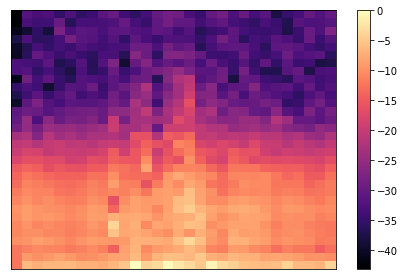

torch.Size([2, 3750])


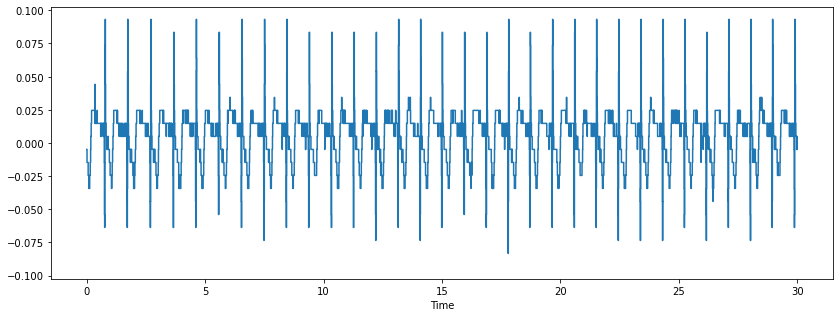

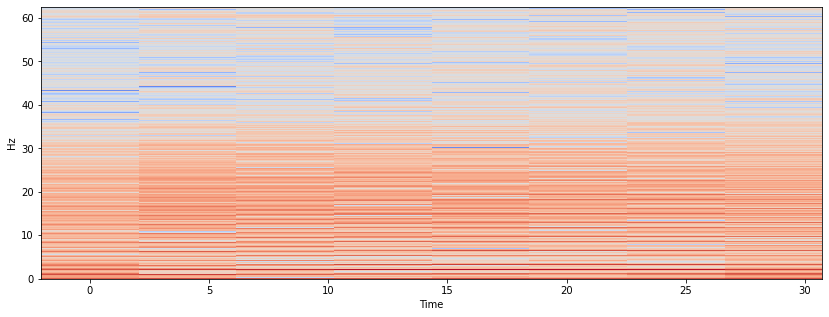

plot size (32, 30)
91.34031650036884 -32.502766170619914
0.5826806330007377 0.3349944676587602


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.01470588 -0.01470588 ... -0.00490196  0.00490196
 -0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


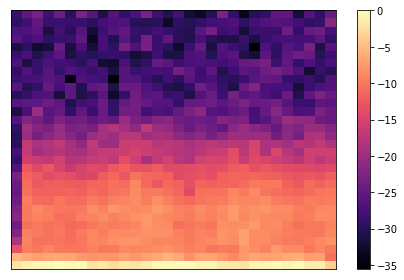

torch.Size([2, 3750])


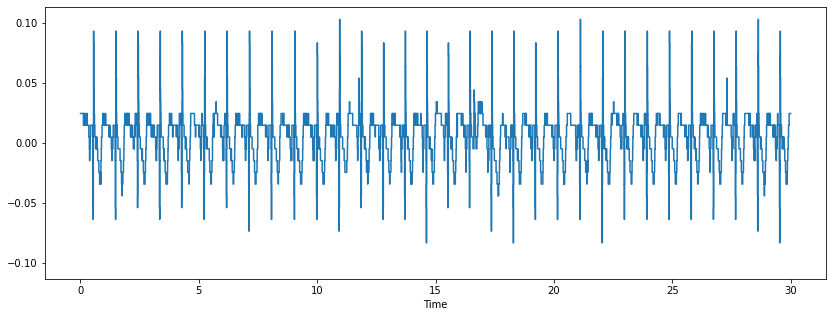

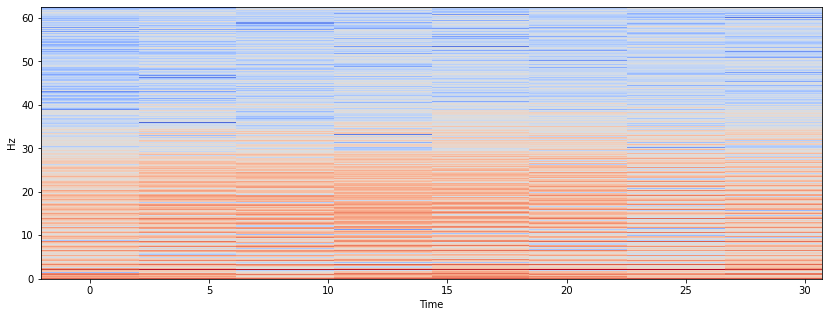

plot size (32, 30)
93.8317930578265 -33.239236725395834
0.5876635861156531 0.3335215265492083


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.0245098 0.0245098 0.0245098 ... 0.0245098 0.0245098 0.0245098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


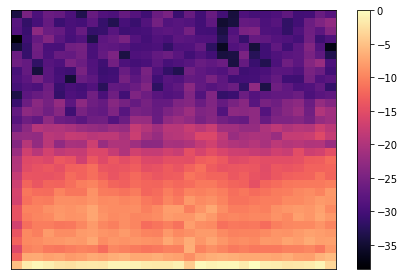

torch.Size([2, 3750])


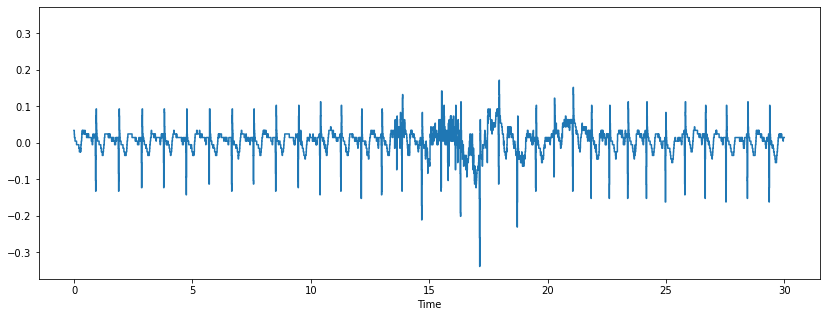

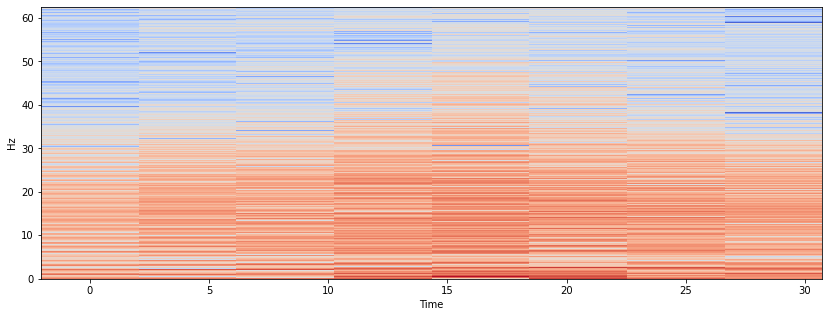

plot size (32, 30)
113.1746120048463 -21.639325925386764
0.6263492240096925 0.35672134814922646


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.03431373 0.0245098  0.01470588 ... 0.01470588 0.01470588 0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


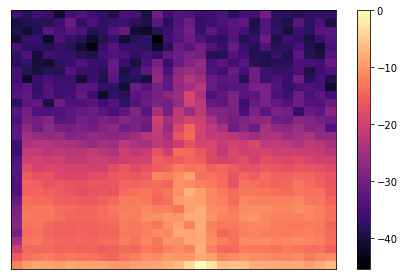

torch.Size([2, 3750])


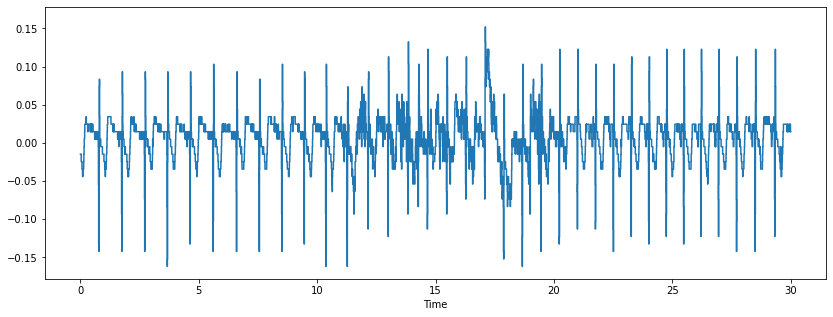

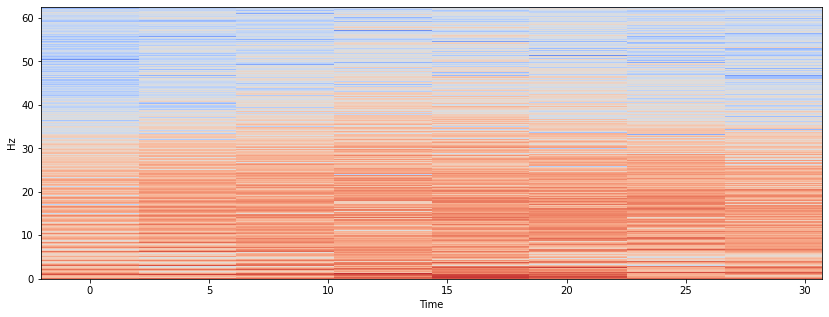

plot size (32, 30)
108.41736081591262 -21.990642541195342
0.6168347216318252 0.35601871491760934


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.01470588 -0.01470588 ...  0.0245098   0.01470588
  0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


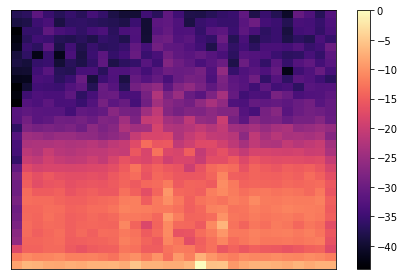

torch.Size([2, 3750])


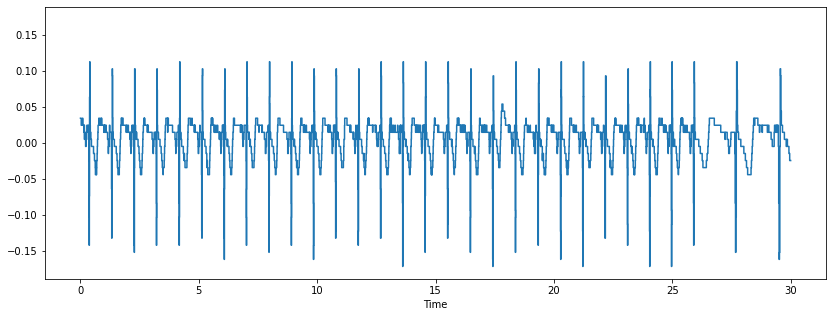

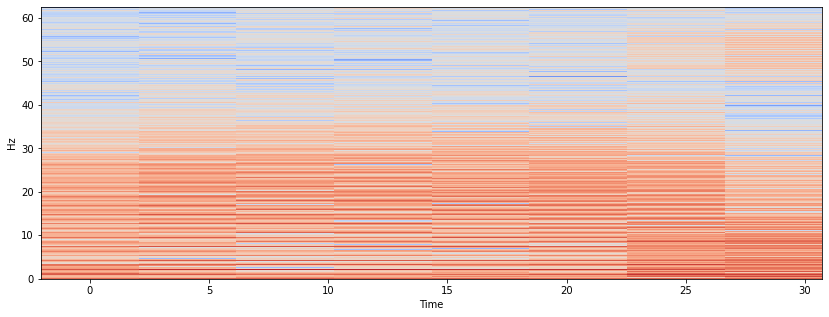

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.03431373  0.03431373  0.03431373 ... -0.0245098  -0.0245098
 -0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
109.51640735924559 -20.77425877719242
0.6190328147184911 0.35845148244561514


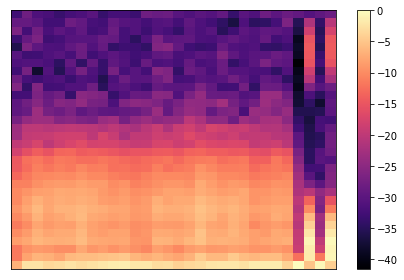

torch.Size([2, 3750])


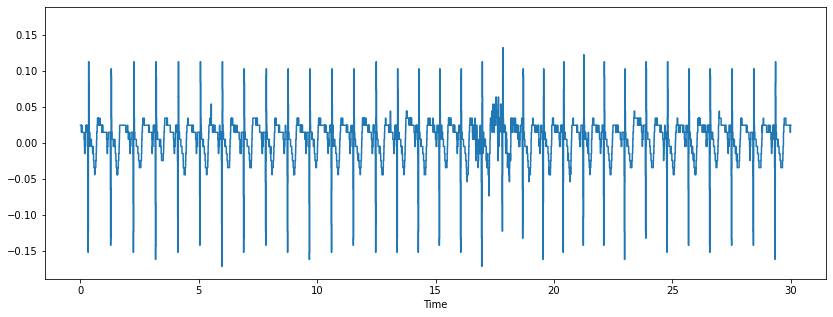

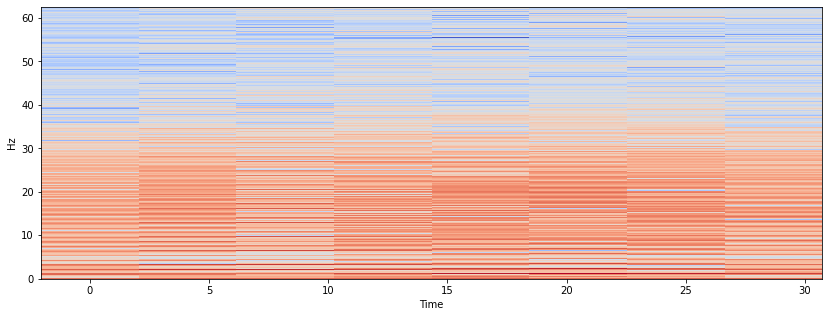

plot size (32, 30)
110.09058214127 -22.345286330709882
0.6201811642825401 0.35530942733858023


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.0245098  0.0245098  0.0245098  ... 0.01470588 0.0245098  0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


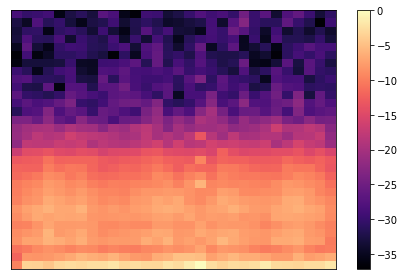

torch.Size([2, 3750])


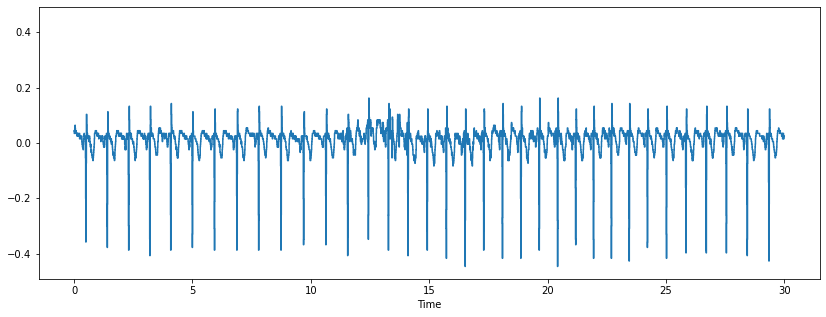

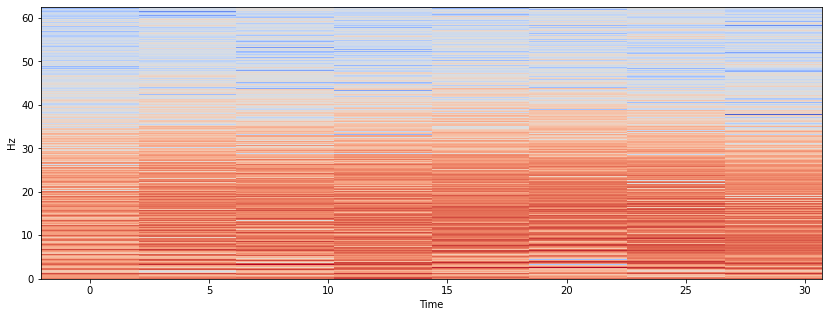

plot size (32, 30)
139.0326216605573 -21.71930096114668
0.6780652433211146 0.35656139807770665


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.04411765 0.03431373 0.03431373 ... 0.0245098  0.0245098  0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


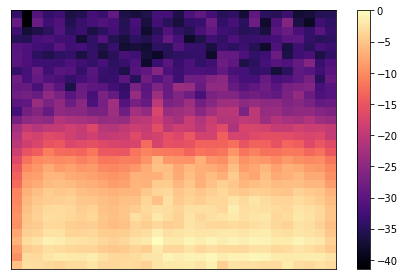

torch.Size([2, 3750])


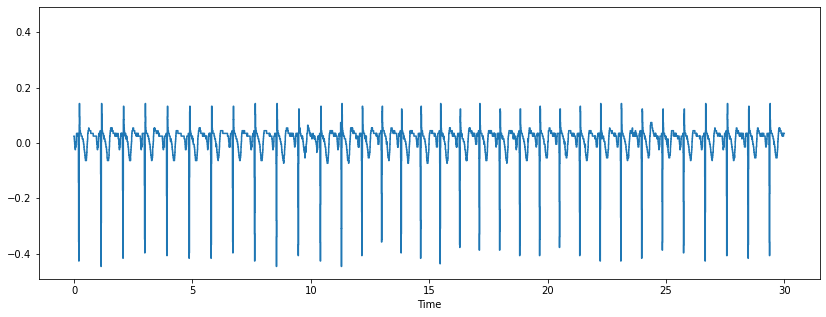

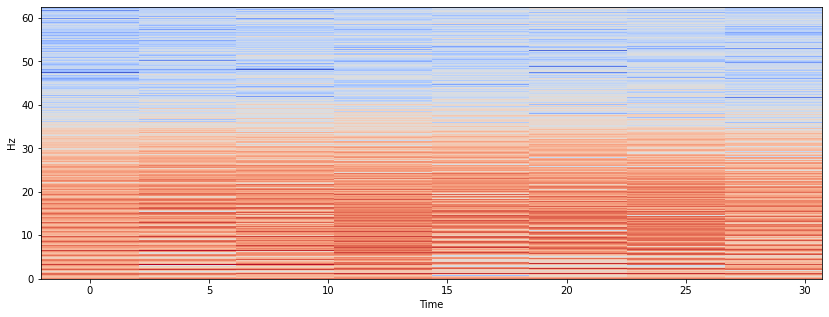

plot size (32, 30)
142.78411820702325 -26.753127664091416
0.6855682364140465 0.3464937446718172


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.0245098  0.01470588 0.00490196 ... 0.03431373 0.03431373 0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


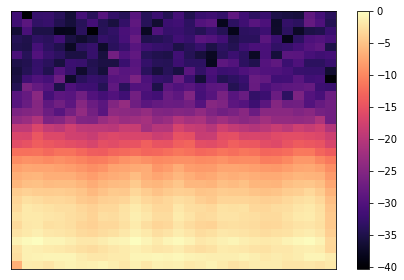

torch.Size([2, 3750])


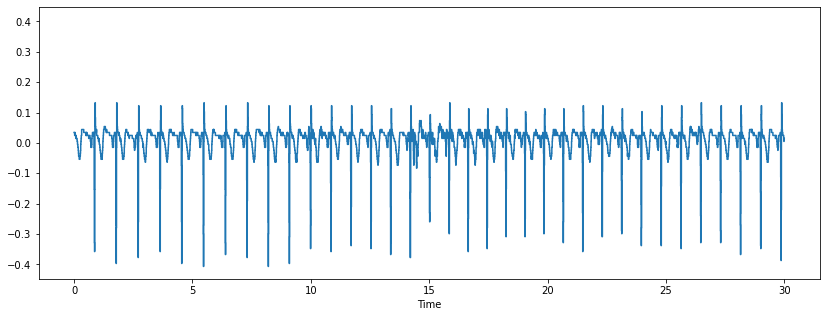

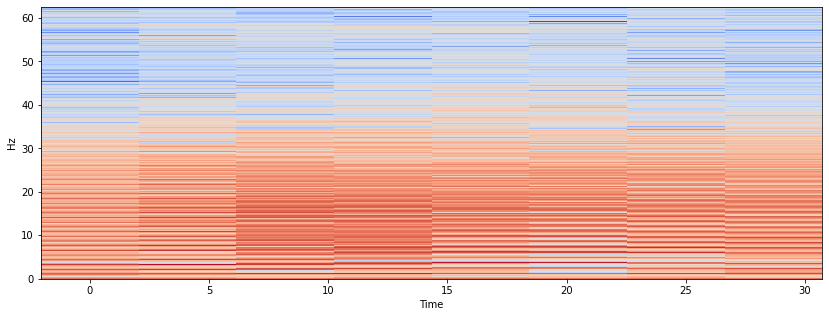

plot size (32, 30)
138.9119773102344 -25.047685669549608
0.6778239546204688 0.34990462866090083


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.03431373 0.03431373 0.03431373 ... 0.00490196 0.01470588 0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


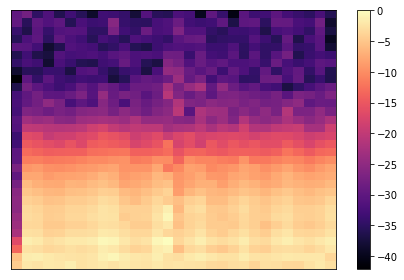

torch.Size([2, 3750])


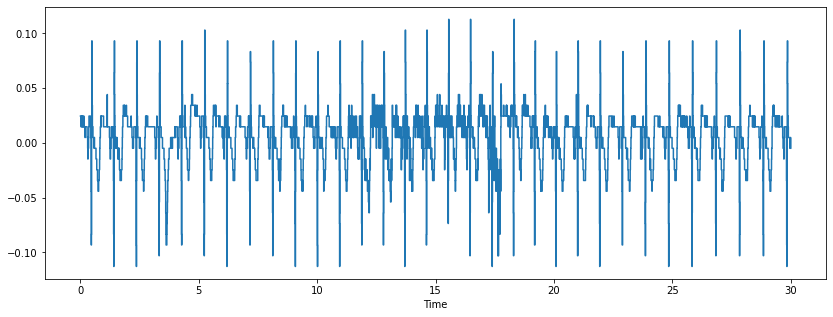

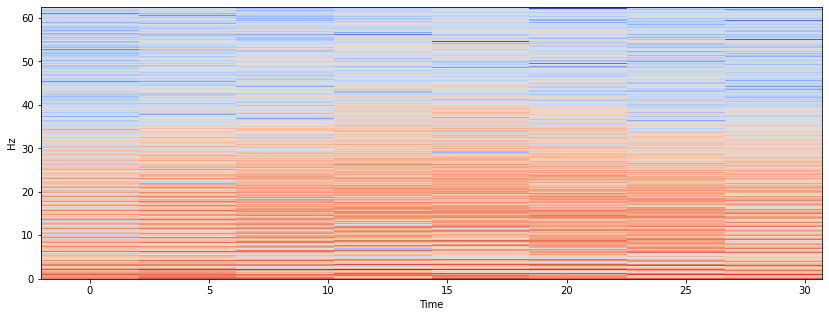

plot size (32, 30)
101.52860368489952 -18.75845375605799
0.6030572073697991 0.3624830924878841


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.0245098   0.0245098   0.0245098  ... -0.00490196  0.00490196
 -0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


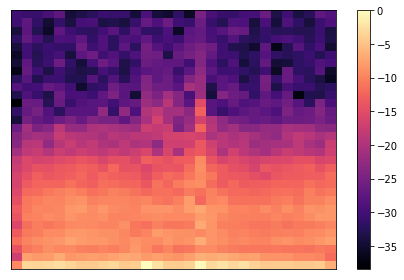

torch.Size([2, 3750])


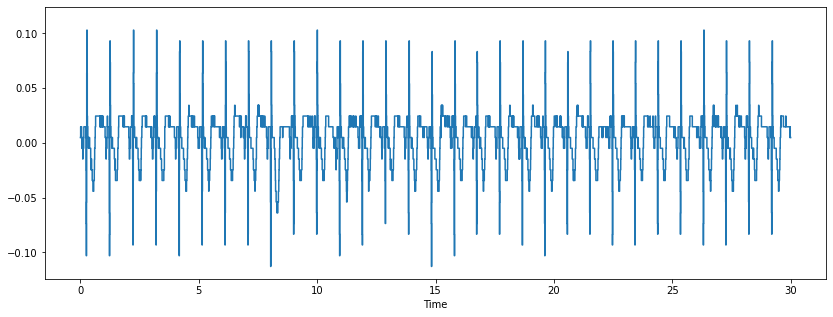

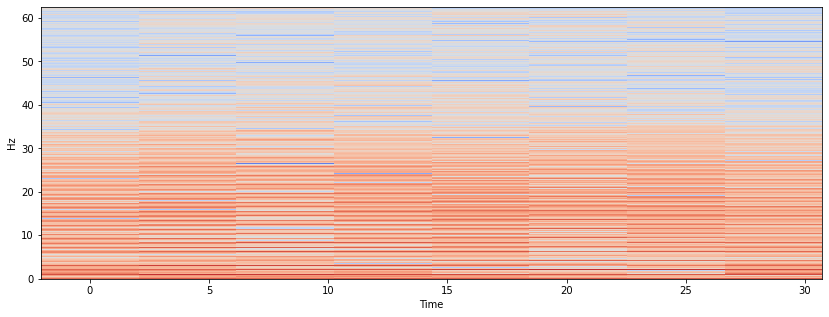

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.00490196 0.01470588 0.00490196 ... 0.00490196 0.00490196 0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
100.81377741482697 -22.721414144734364
0.6016275548296539 0.3545571717105313


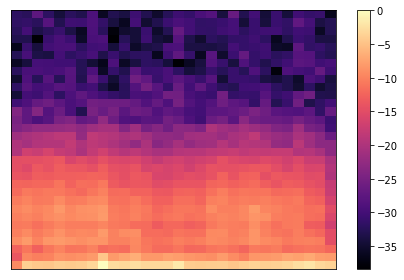

torch.Size([2, 3750])


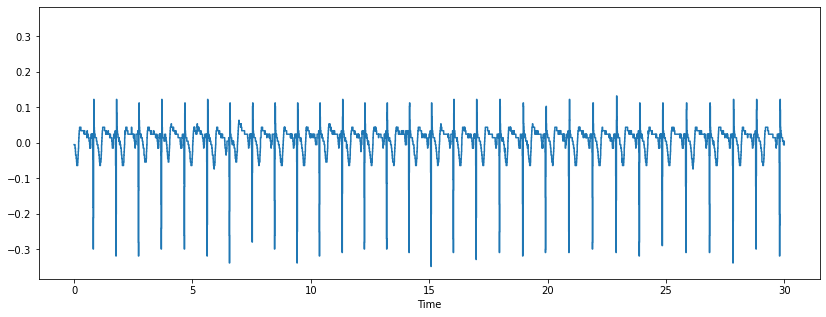

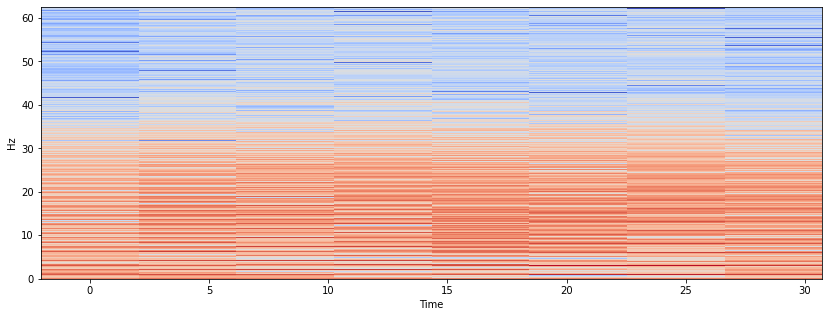

plot size (32, 30)
135.47215948158714 -25.367292160881526
0.6709443189631743 0.34926541567823693


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.00490196 ... -0.00490196  0.00490196
 -0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


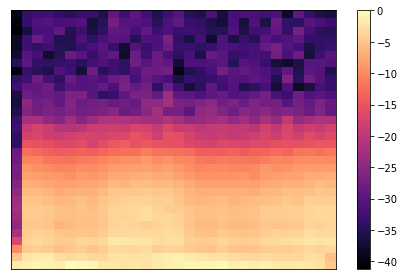

torch.Size([2, 3750])


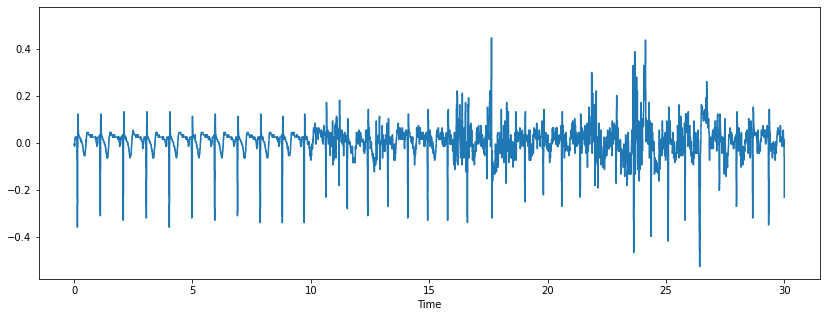

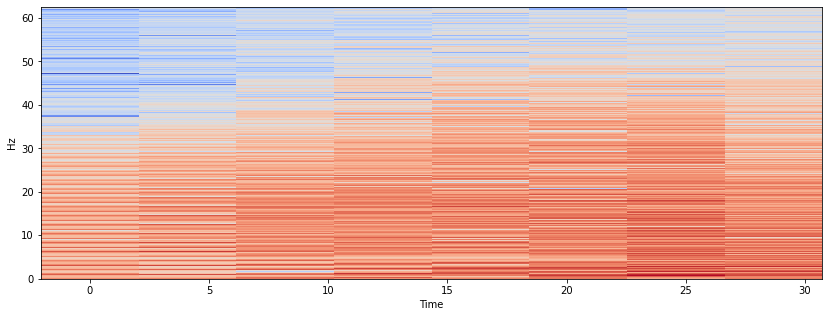

plot size (32, 30)
150.1819043462921 -31.698688951962957
0.7003638086925842 0.33660262209607406


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.00490196 -0.00490196 -0.01470588 ...  0.01470588 -0.05392157
 -0.23039216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


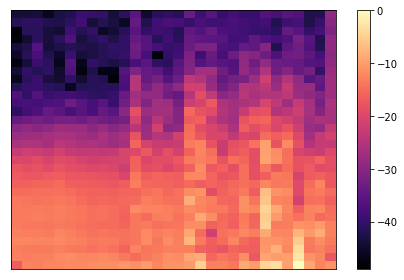

torch.Size([2, 3750])


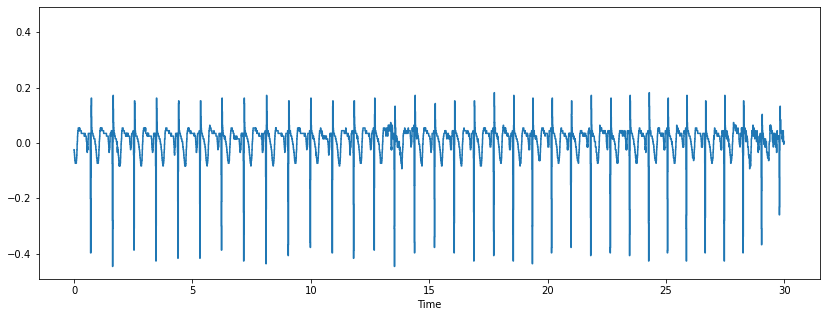

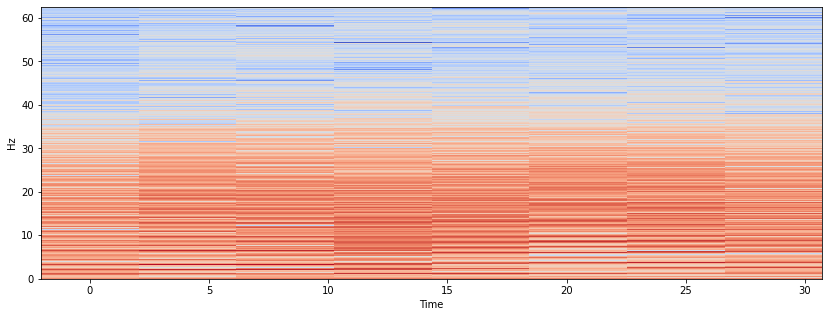

plot size (32, 30)
142.3410146284859 -26.82509231039559
0.6846820292569719 0.34634981537920884


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.0245098  -0.03431373 -0.04411765 ...  0.00490196  0.00490196
  0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


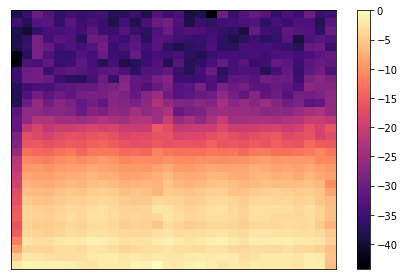

torch.Size([2, 3750])


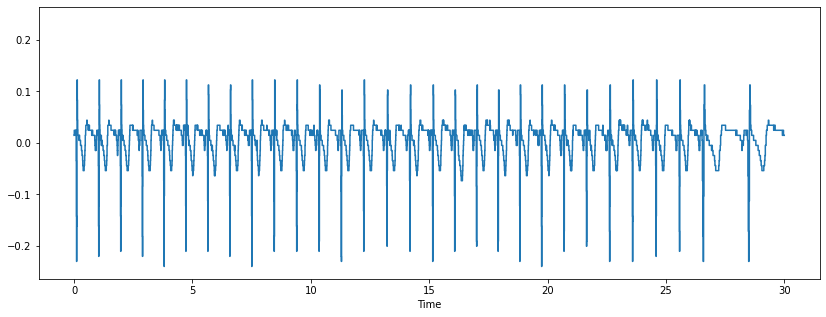

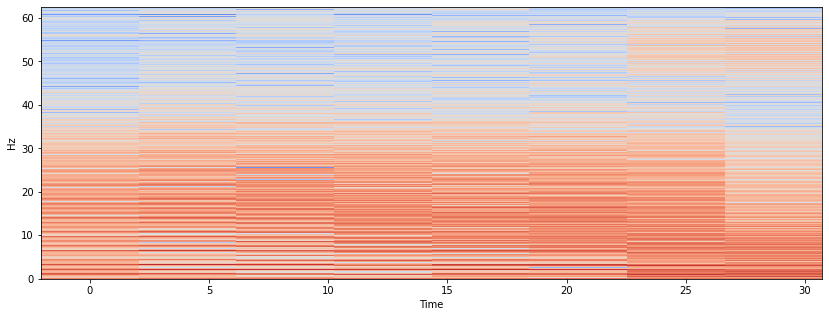

plot size (32, 30)
122.7060393650246 -21.729886373756354
0.6454120787300492 0.3565402272524873


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.01470588 0.0245098  0.0245098  ... 0.01470588 0.01470588 0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


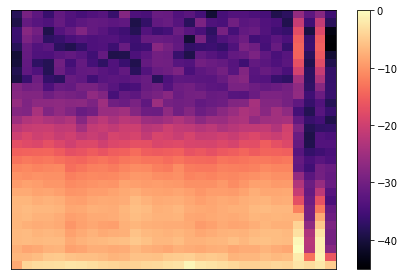

torch.Size([2, 3750])


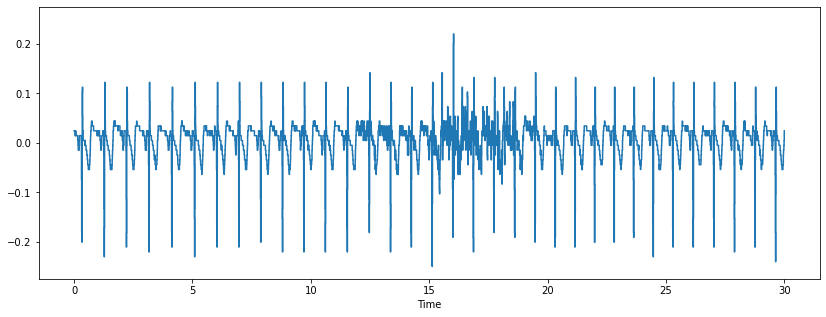

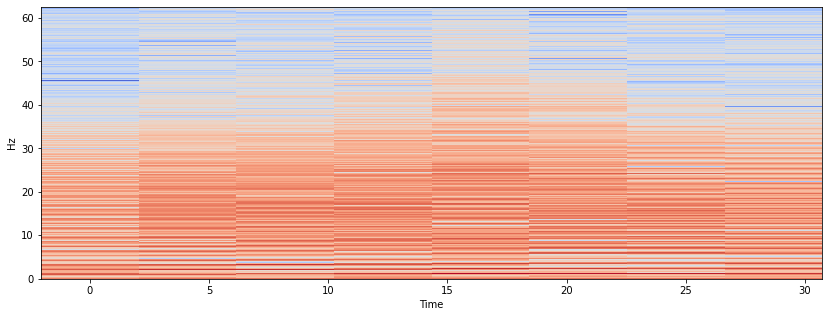

plot size (32, 30)
123.09905091751294 -23.283104077900965
0.6461981018350259 0.3534337918441981


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.0245098   0.0245098   0.0245098  ... -0.00490196  0.00490196
  0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


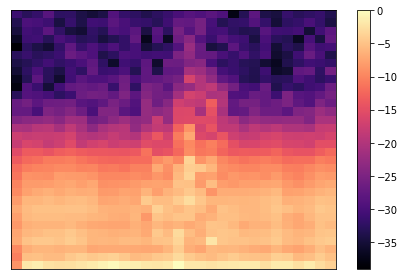

torch.Size([2, 3750])


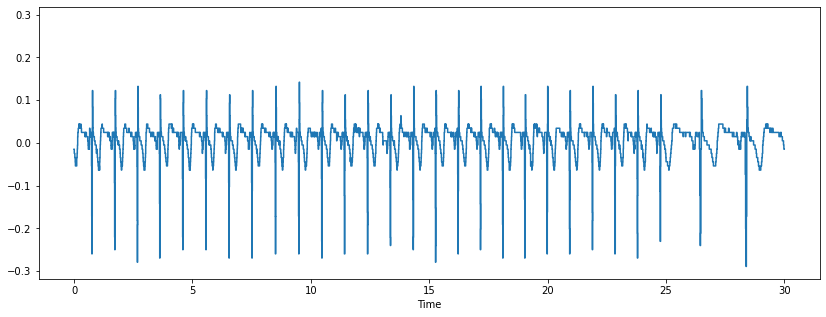

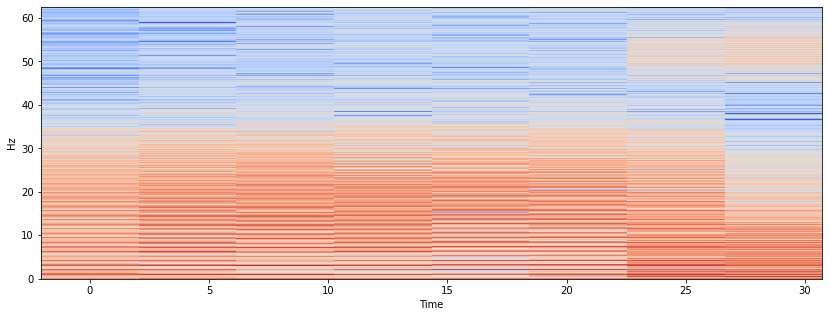

C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.0245098  -0.0245098  ... -0.01470588 -0.01470588
 -0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


plot size (32, 30)
127.02270219129863 -23.17001275596359
0.6540454043825973 0.3536599744880728


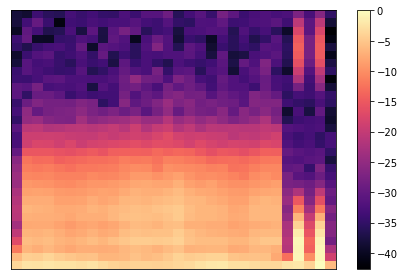

torch.Size([2, 3750])


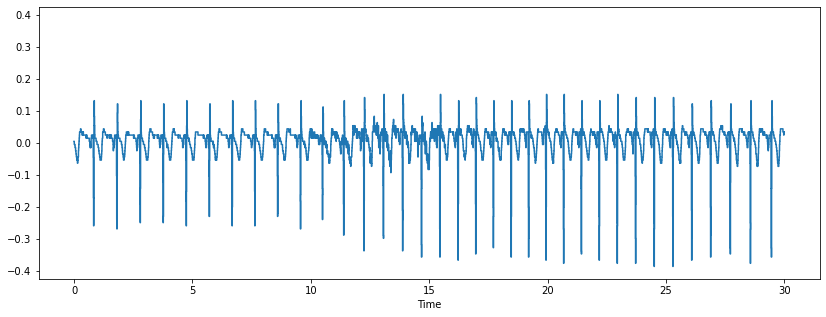

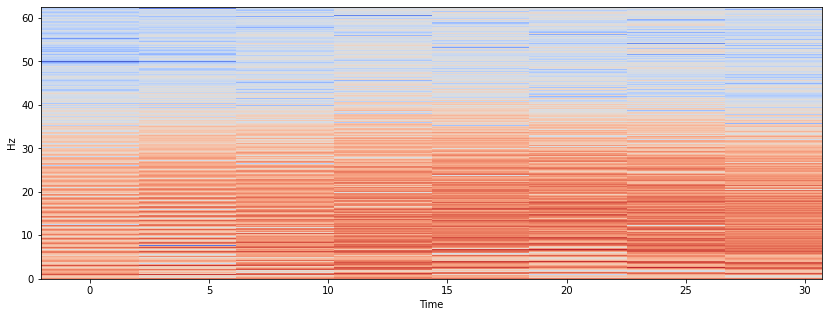

plot size (32, 30)
137.43600887852898 -26.83868909298645
0.674872017757058 0.3463226218140271


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.00490196 -0.00490196 -0.00490196 ...  0.03431373  0.03431373
  0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


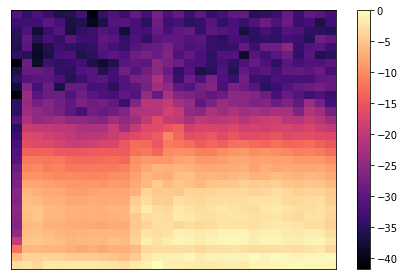

torch.Size([2, 3750])


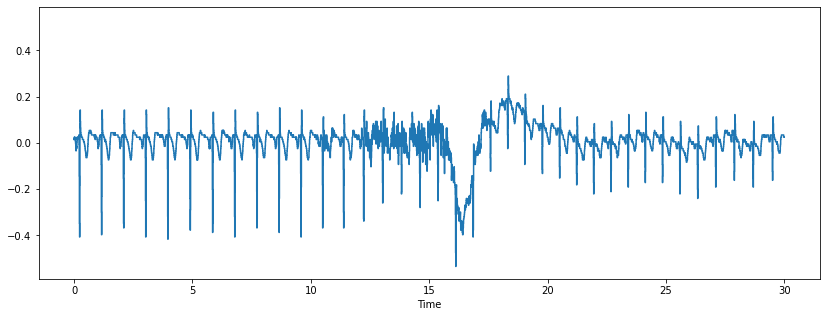

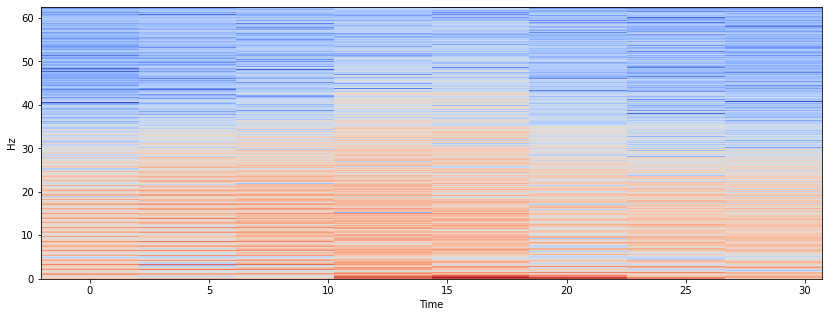

plot size (32, 30)
139.92392929796773 -24.406634779332933
0.6798478585959354 0.35118673044133414


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.01470588 0.0245098  0.01470588 ... 0.0245098  0.0245098  0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


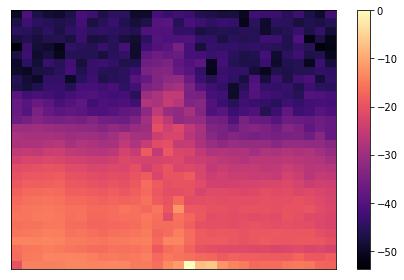

torch.Size([2, 3750])


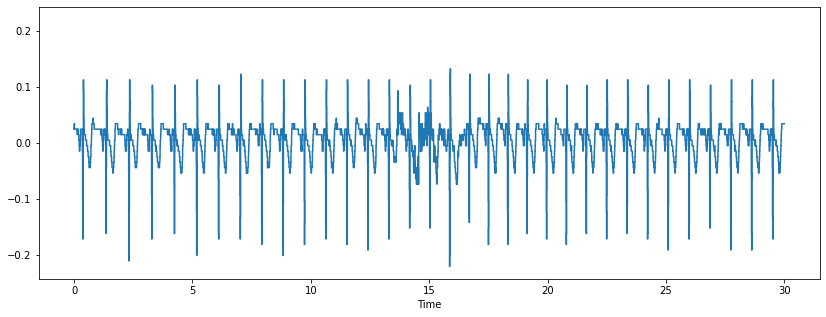

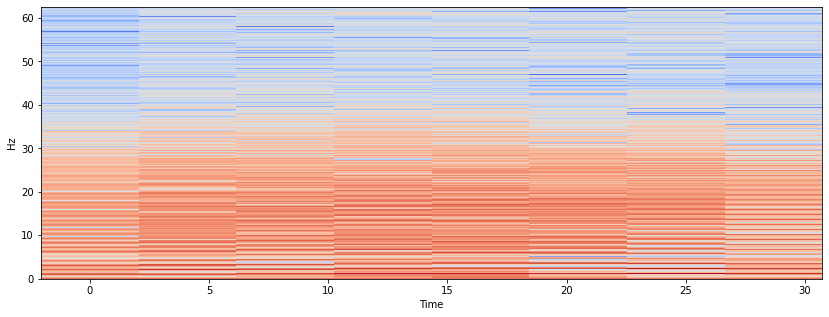

plot size (32, 30)
120.43321725752051 -24.11797700424335
0.640866434515041 0.3517640459915133


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[0.0245098  0.03431373 0.0245098  ... 0.03431373 0.03431373 0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


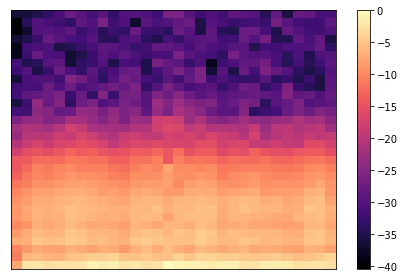

torch.Size([2, 3750])


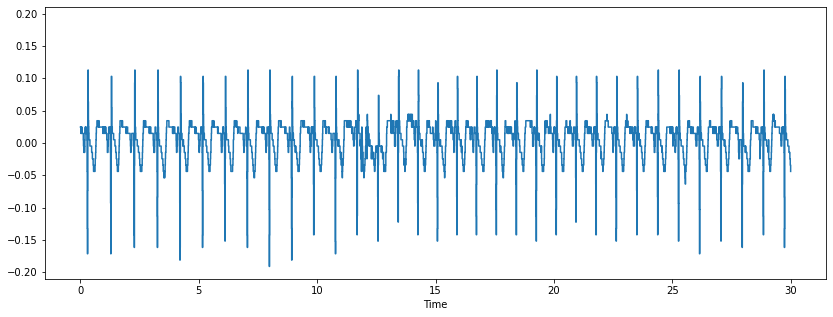

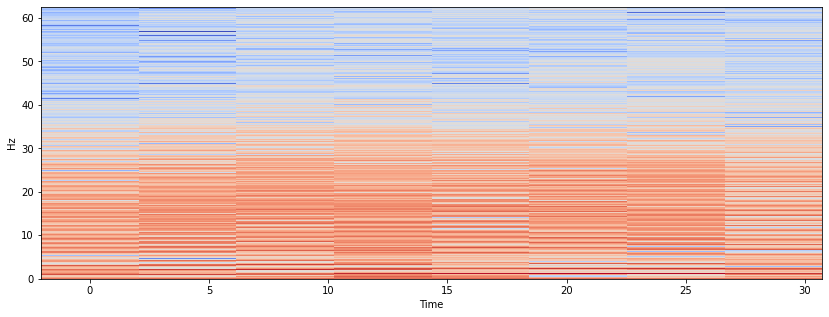

plot size (32, 30)
118.9826582790129 -18.49324881367953
0.6379653165580257 0.3630135023726409


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.0245098   0.0245098   0.01470588 ... -0.03431373 -0.03431373
 -0.04411765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


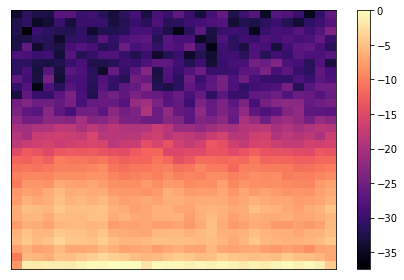

torch.Size([2, 3750])


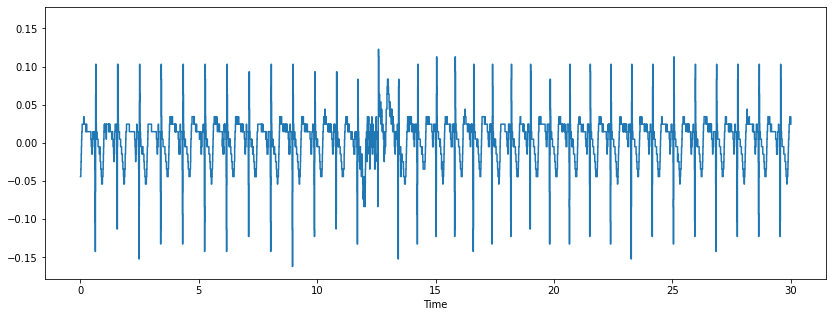

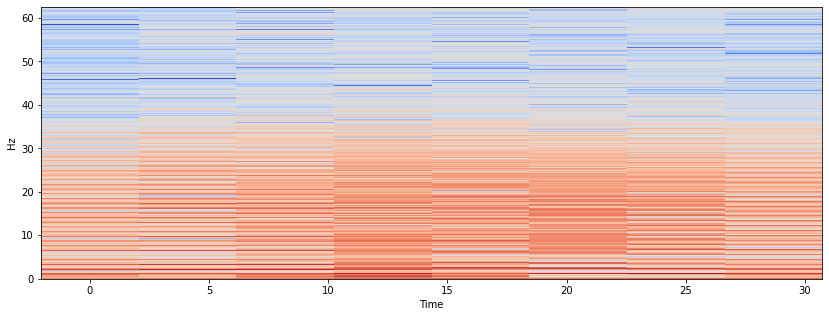

plot size (32, 30)
109.17808248931871 -19.011579812942134
0.6183561649786374 0.36197684037411576


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.04411765 -0.04411765 -0.03431373 ...  0.0245098   0.03431373
  0.0245098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


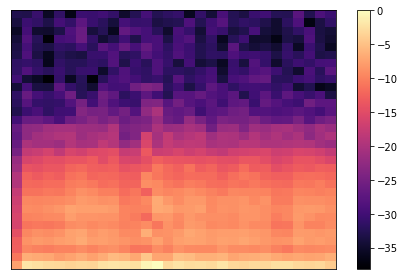

torch.Size([2, 3750])


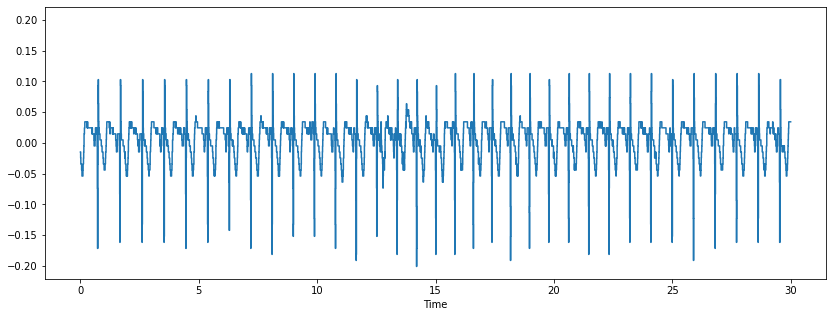

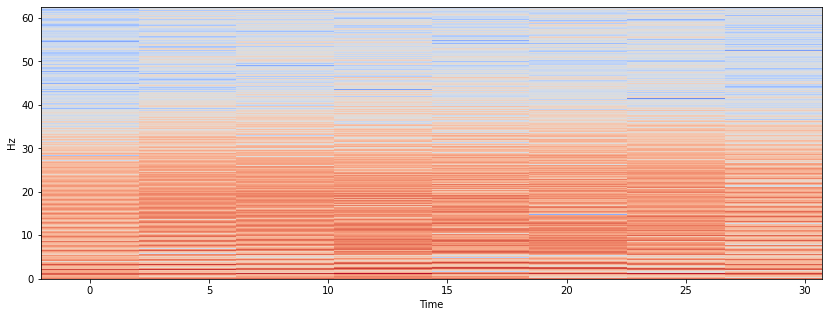

plot size (32, 30)
117.29665187956903 -20.560973969618793
0.634593303759138 0.3588780520607624


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.01470588 -0.0245098  -0.03431373 ...  0.03431373  0.03431373
  0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


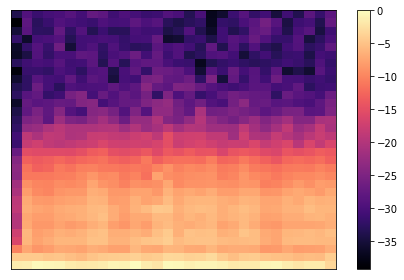

torch.Size([2, 3750])


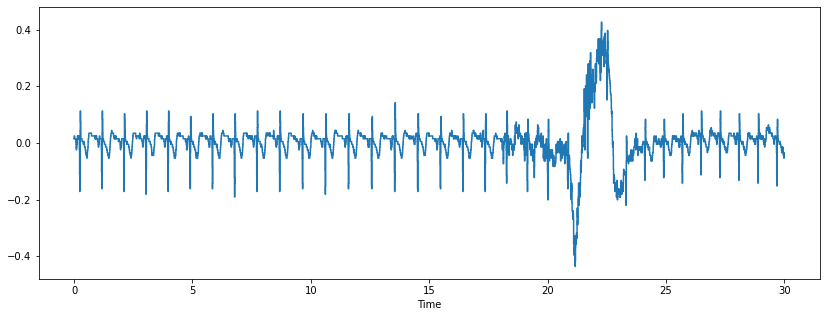

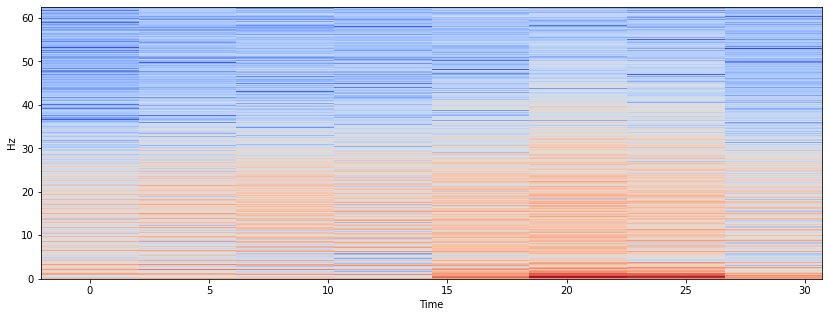

plot size (32, 30)
117.2315674517532 -21.829318293803667
0.6344631349035065 0.35634136341239264


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.01470588  0.0245098   0.0245098  ... -0.05392157 -0.04411765
 -0.03431373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


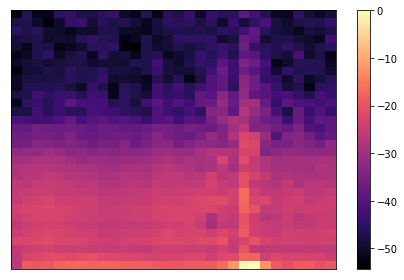

torch.Size([2, 3750])


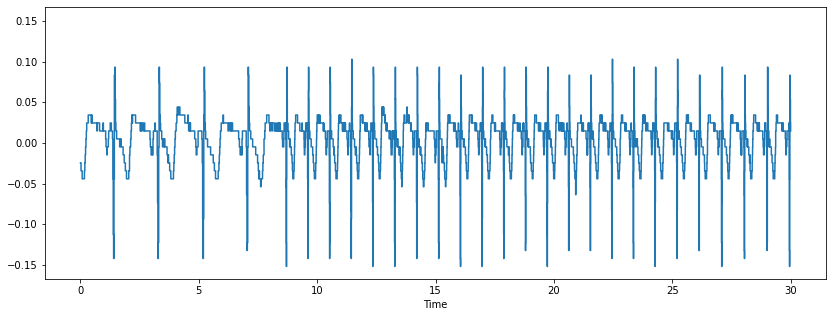

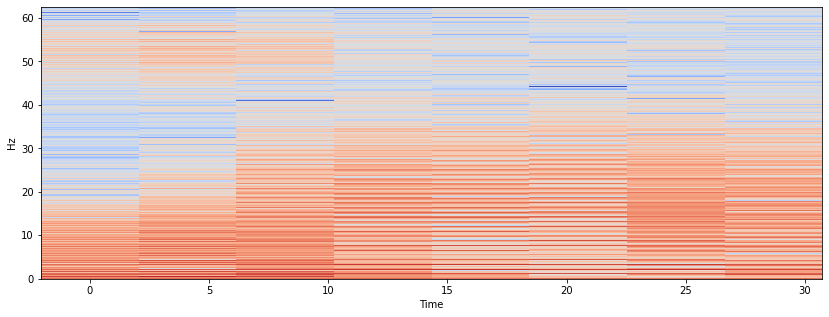

plot size (32, 30)
112.09268994045692 -41.54227151502274
0.6241853798809138 0.3169154569699545


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.0245098  -0.0245098  -0.0245098  ...  0.05392157  0.0245098
  0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


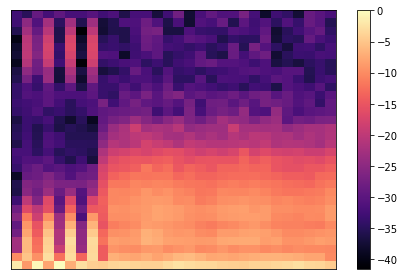

torch.Size([2, 3750])


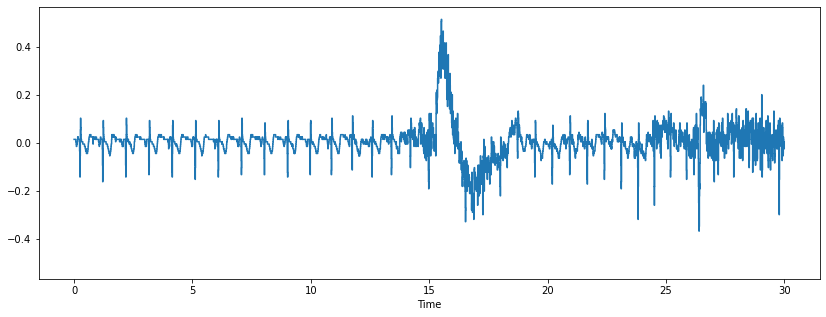

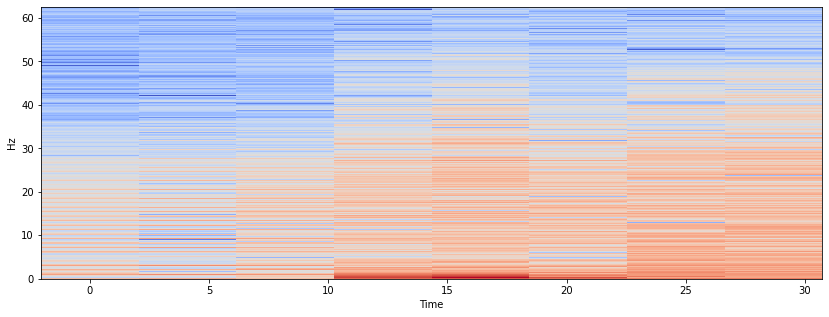

plot size (32, 30)
114.23890259451694 -24.964869361253655
0.628477805189034 0.3500702612774927


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[ 0.01470588  0.01470588  0.01470588 ... -0.0245098  -0.0245098
  0.00490196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


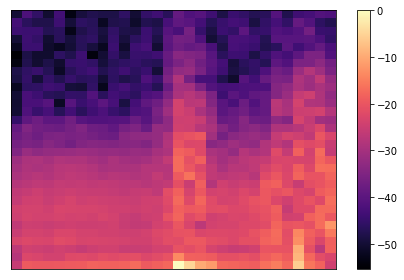

torch.Size([2, 3750])


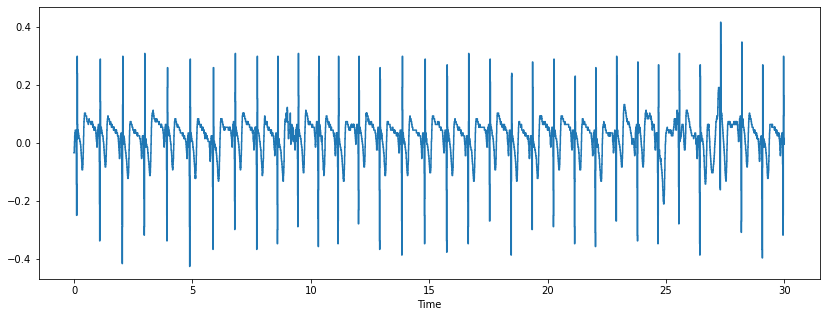

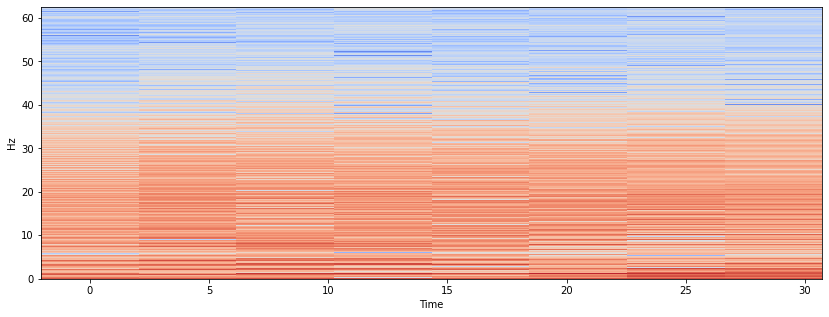

plot size (32, 30)
132.66222927292378 -23.9160316760354
0.6653244585458477 0.35216793664792917


C:\Users\Bpradsad\AppData\Local\Temp\ipykernel_5128\3022469796.py:37: FutureWarning: Pass y=[-0.03431373 -0.01470588  0.00490196 ...  0.00490196 -0.00490196
  0.01470588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used


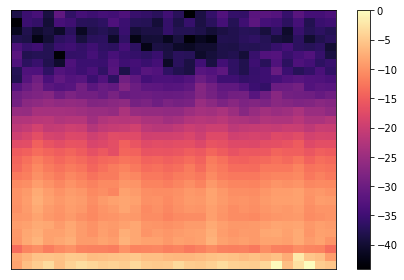

torch.Size([2, 3750])



KeyboardInterrupt



In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np 
import pandas as pd
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, models, transforms
import torch.optim as optim


for i,j in train_loader:
    cnt+=1
    print(i.shape)
    if cnt == 3:
        break
    plt.figure(figsize=(14, 5))
    ####################
    x = np.array(i[0])
    sample_rate = 125
    #####################
    librosa.display.waveshow(x, sr=sample_rate)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    Xdb.shape
    plt.show()
    S = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=256, hop_length=128, n_mels=32) # Here, I am specifying the number of mel-filters to be used
    
    # n_mels >> 32
    log_S = librosa.power_to_db(S, ref=np.max)
    MFCC = librosa.feature.mfcc(S=log_S, n_mfcc=10) # While specifying the number of mfcc-coefficients, it keeps 39 coefficients of discrete cosine transformation (DCT)

#     delta2_mfcc = librosa.feature.delta(MFCC, order=2)
    MFCC = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=10, dct_type=2)

    librosa.display.specshow(log_S)

    print("plot size", log_S.shape)
    print(np.max(MFCC),np.min(MFCC))
    MFCC = (MFCC+200)/500
    print(np.max(MFCC),np.min(MFCC))

    plt.colorbar()
    plt.tight_layout()
    plt.show()

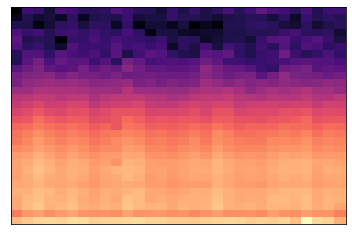

In [15]:
log_S[1:-1].shape
librosa.display.specshow(log_S[1:-1])

In [ ]:
k means with two clusters >>> each p, trained and classified, first part considered for zeros, and second part considered for ones. and trained and check
then go oppsite and check the results!

In [ ]:
log_S.shape

In [ ]:
class Omid_Dataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x_ten = torch.tensor(self.X[idx])
        y_ten = torch.tensor(self.y[idx])
        
        if self.transform:
            x_ten = self.transform(x_ten)
        
        return x_ten, y_ten

In [ ]:
#abelsDict = dict(zip(Fils,one_hot))
data = np.load("C:/Features/ECGFULLALLDATA.npy")[:100]
X_train = np.array(data)   
Fils = data
y_train = np.load("C:/Features/ECGFULLALLDATA_lbl.npy")[:100]
#########################################################
# Fils_2 = Labels['fname']
Fils_2 = y_train

Class =set(y_train)
# All_class= [] 
# for i in Class:
#     for j  in i.split(','):
#         All_class.append(j)

        
All_class = [0,1]
All_class = set(All_class)

NumClasses = len(All_class)
OneHot_All = np.zeros((len(Fils_2), NumClasses))

# for  i,file in enumerate(y_train):
#     for j,clas in enumerate(All_class):
#         if file == 0 and clas == 0:
#             OneHot_All[i,j] = np.int(clas in file)
            
for i, lbl in enumerate(y_train):
    if lbl == 0:
        OneHot_All[i] = np.array([1,0])
    if lbl == 1:
        OneHot_All[i] = np.array([0,1])
        
# #######################################################################

#NumClasses = len(Class2int) 
print(NumClasses)
## split data into training, validation, and test data (features and labels, x and y)
split_frac = 0.79
batch_size = 2

split_idx = int(len(Fils)*split_frac)
split_idx1 = int(batch_size*np.floor(split_idx/batch_size))
split_idx2 = int(batch_size*np.floor( (len(Fils) - split_idx1)/batch_size ))
train_x, val_x = Fils[:split_idx1], Fils[split_idx1:split_idx1+split_idx2]
train_y, val_y = OneHot_All[:split_idx1,:], OneHot_All[split_idx1:split_idx1+split_idx2,:]
print(len(train_x)/batch_size, len(val_x)/batch_size )

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split( Fils, OneHot_All, test_size=1-split_frac, random_state=42)
print(train_x.shape,val_x.shape,train_y.shape,val_y.shape)

# ######################################################################

In [ ]:
from scipy.io import wavfile
from librosa.feature import mfcc
from torch.utils import data
from torchvision import datasets, models, transforms

class Dataset(data.Dataset):
    def __init__(self, X, labels, DecNum=5, fft_Samp=125, Im_3D=False):
        'Initialization'
        self.X = X
        self.labels = labels
        self.fft_Samp = fft_Samp 
        self.Im_3D = Im_3D
        self.NFCC_Num = 128
        self.TimeSamp = 128
        
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)

    def __getitem__(self, index):
        'Generates one sample of data'

        data = X
        fs = 125       
        data = torch.tensor(self.X[index])

        if self.transform:
            data = self.transform(data)
        
        data = np.float32(data)
        S = librosa.feature.melspectrogram(data, sr=sample_rate, n_mels=128)
        Mel = librosa.power_to_db(S, ref=np.max)/10 + 4
        LabelOut = torch.from_numpy(self.labels[index]).double()
        
        Im = torch.zeros((self.NFCC_Num,self.TimeSamp)).type(torch.FloatTensor)
        Ssum = np.sum(Mel,axis=0)
        MaxE = np.argmax(Ssum)
        if MaxE > Mel.shape[1]-64 : 
            MaxE = Mel.shape[1]-65
        if MaxE< 64 :
            MaxE = 64
        if Mel.shape[1] > self.TimeSamp :
            Im = torch.from_numpy(Mel[:,MaxE-64:MaxE+64])
        else: 
            Im[:,:Mel.shape[1]  ] = torch.from_numpy(Mel)
        
        Im = Im.double()
        return Im, LabelOut

In [ ]:
from torch.utils import data
labelsDict_train = zip(train_x,train_y)
labelsDict_val = zip(val_x,val_y)


params = {'batch_size': batch_size,
          'shuffle': True,
          'num_workers': 9}
params_v = {'batch_size': batch_size,
          'shuffle': False,
          'num_workers': 3}
RecLen = 176400

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# training_set = Dataset(train_x.tolist(), labelsDict_train,WavPath,RecLen,transforms.Compose(normalize))
training_set = Dataset(train_x.tolist(), labelsDict_train)
# training_set = Dataset(train_x.tolist(), train_y)
training_generator = data.DataLoader(training_set, **params)

val_set = Dataset(val_x.tolist(), labelsDict_val)
# val_set = Dataset(val_x.tolist(), val_y)
val_generator = data.DataLoader(val_set, **params_v)

In [ ]:
class CnnAudioNet(nn.Module):
    def __init__(self,NumClasses):
        super(CnnAudioNet,self).__init__()
        self.NumClasses = NumClasses
        self.Fc_features = 128
        self.C1 = nn.Conv2d(1,32,5,padding=1)
        self.C2 = nn.Conv2d(32,32,5,padding=1)
        self.C3 = nn.Conv2d(32,64,5,padding=1)
        self.C4 = nn.Conv2d(64,64,5,padding=1)
        
        self.BN1 = nn.BatchNorm2d(32)
        self.BN2 = nn.BatchNorm2d(64)
        self.BN3 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.maxpool2 = nn.MaxPool2d((1,2),(1,2))
        
        
        self.fc1 = nn.Linear(64*8*8,128)
        self.fc2 = nn.Linear(128,self.NumClasses )
        self.dropout = nn.Dropout(0.25)
        self.Bat1 = nn.BatchNorm1d(128)
    def forward(self,x):
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.BN1(self.C1(x)))
        x = self.maxpool1(F.relu(self.BN1(self.C2(x))))
        x = F.relu(self.BN2(self.C3(x)))
        x = self.maxpool1(F.relu(self.BN2(self.C4(x))))
        x = F.relu(self.BN2(self.C4(x)))
        x = self.maxpool1(F.relu(self.BN2(self.C4(x))))
        x = F.relu(self.BN2(self.C4(x)))
        x = F.relu(self.BN3(self.C4(x)))
        # flatten image input
        x = self.dropout(x.view(-1,64*8*8))
        # add dropout layer
        x =  self.dropout(self.fc1(x))
        # add 1st hidden layer, with relu activation function
        # add dropout layer
        # add 2nd hidden layer, with relu activation function
        #x = torch.sigmoid(self.fc2(x))
        x = self.fc2(x)
        return x
        

In [ ]:
from torchvision import datasets, models, transforms
# Freeze training for all layers
class CnnTransferNet(nn.Module):
    def __init__(self):
        super(CnnTransferNet,self).__init__()
        self.vgg =  models.vgg16_bn().cuda()
        for param in self.vgg.features.parameters():
            param.require_grad = False
        self.fc1 = nn.Linear(1000,128)
        self.fc2 = nn.Linear(128,NumClasses)
        self.dropout = nn.Dropout(0.25)
    def forward(self,x):
        # add sequence of convolutional and max pooling layers
        Features = self.dropout(self.vgg(x))
        # flatten image input
        # add 1st hidden layer, with relu activation function
        Features = F.relu(self.fc1(Features))
        # add dropout layer
        # add 2nd hidden layer, with relu activation function
        Features = self.fc2(Features)
        return Features

In [ ]:
model = CnnAudioNet(NumClasses=2)
# if train_on_gpu:
#     model.cuda()
print(model)
# specify loss function (MSE)

#criterion = nn.MSELoss()
#criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
#criterion = nn.MultiLabelSoftMarginLoss()

optimizer = optim.Adam(params=model.parameters(), lr=0.001)# specify optimizer
#optimizer = optim.Adam(model.parameters(), lr=0.005)


# data = np.load("C:/Features/ECGFULLALLDATA.npy")
# X_train = np.array(data)   

# a = train_x.tolist()

In [ ]:
import time
start_time = time.time()
#Warnings.filterwarnings('ignore')

#number of epochs to train the model
n_epochs = 1
valid_loss_min = np.Inf # track change in validation loss
print("Start training:")
idx = 0
for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    TotMSE = 0 
    TotEl = 0
    ###################
    # train the model #
    ###################
    model.train()

    for dataBatch, target in training_generator:
#     for dataBatch, target in train_loader:   
        
        idx+=1

#         # move tensors to GPU if CUDA is available
#         if train_on_gpu:
#             dataBatch, target = dataBatch.unsqueeze(1).float().cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(dataBatch)
        # calculate the batch loss
        #loss = criterion(output, torch.squeeze(torch.argmax(target,dim=-1)))
        loss = criterion(output,target.float())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*dataBatch.size(0)
        #print(loss.item())
        #print('Finish batch')
        _,pred = torch.max(output,1)
        
        #Correct = torch.sum(torch.pow(output-target.float(),2))#
        ErrorS = torch.sum(torch.pow(torch.sigmoid(output)-target.float(),2))#
        TotMSE += ErrorS
        TotEl += output.numel()
        Correct =torch.sum(pred ==torch.squeeze(torch.argmax(target,dim=-1)))
        
        
        #print('Train batch loss: {:.6f},  Error: {:.4f},  Sum Correct: {} out of {}'.format(loss,ErrorS,Correct,output.shape[0]))
    print('Epoch: {} \t  Train batch loss: {:.6f} '.format(epoch,loss))

        
    ######################    
    # validate the model #
    ######################
    with torch.no_grad():
        model.eval()
        TotEl_v = 0
        valid_loss = 0 
        TotMSE_v = 0
        for dataBatch_v, target ,_ in val_generator:

        # move tensors to GPU if CUDA is available
            if train_on_gpu:
                dataBatch_v, target = dataBatch_v.unsqueeze(1).float().cuda(),target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = model(dataBatch_v)
            
                    # calculate the batch loss
            loss = criterion(output,target.float())

            #loss = criterion(output, torch.squeeze(torch.argmax(target,dim=-1)))
        # update average validation loss 
            output.shape
            _,pred = torch.max(output,1)
            Correct = torch.sum(pred ==torch.squeeze(torch.argmax(target,dim=-1)))
            #SumCorrectVal += Correct
            valid_loss += loss.item()*dataBatch.size(0)
            #print(TotVal)

            ErrorS = torch.sum(torch.pow(torch.sigmoid(output)-target.float(),2))#
            TotMSE_v += ErrorS
            TotEl_v += output.numel()
        # calculate average losses
        train_lossM = train_loss/len(training_generator.dataset)
        valid_lossM = valid_loss/len(val_generator.dataset)
        MSE = TotMSE/TotEl
        MSE_V = TotMSE_v/TotEl_v

        # print training/validation statistics 
        print('Epoch: {} \t Training Loss: {:.6f}, Train MSE: {:.4f} \tValidation Loss: {:.6f},  Val MSE: {:.4f} '.format(
            epoch, train_lossM,MSE, valid_lossM,MSE_V))
        print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
len(training_generator.dataset)